### Questions of Interest
1. How does a student's environment affect their mathematical understanding in Iran?
2. Does gender have an effect on the understanding of students?
3. How does a student's environment affect their academic understanding in different mathematical fields in Iran?

In [ ]:
!wget https://download.fedoraproject.org/pub/fedora/linux/releases/37/Workstation/x86_64/iso/Fedora-Workstation-Live-x86_64-37-1.7.iso

--2023-02-11 11:03:26--  https://download.fedoraproject.org/pub/fedora/linux/releases/37/Workstation/x86_64/iso/Fedora-Workstation-Live-x86_64-37-1.7.iso
Resolving download.fedoraproject.org (download.fedoraproject.org)... 209.132.190.2, 152.19.134.142, 34.221.3.152, ...
Connecting to download.fedoraproject.org (download.fedoraproject.org)|209.132.190.2|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ftp-nyc.osuosl.org/pub/fedora/linux/releases/37/Workstation/x86_64/iso/Fedora-Workstation-Live-x86_64-37-1.7.iso [following]
--2023-02-11 11:03:27--  https://ftp-nyc.osuosl.org/pub/fedora/linux/releases/37/Workstation/x86_64/iso/Fedora-Workstation-Live-x86_64-37-1.7.iso
Resolving ftp-nyc.osuosl.org (ftp-nyc.osuosl.org)... 64.50.233.100, 2600:3404:200:237::2
Connecting to ftp-nyc.osuosl.org (ftp-nyc.osuosl.org)|64.50.233.100|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2037372928 (1.9G) [application/octet-stream]
Saving to:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/University (Masters)/Timss/TIMSS2019.xlsx')
df

,IDCNTRY,IDBOOK,IDSCHOOL,IDCLASS,IDSTUD,finalscore,totalscore,finalscorealgebra,finalscoredat,finalscoregeo,...,BTBM23,BTDGEAS,BTDGLSN,BTDGSOS,BTDGTJS,BTDMMME,BTDMNUM,BTDMALG,BTDMGEO,BTDMDAT
0,364.0,1.0,5001.0,500104.0,50010404.0,D,14.0,A,D,E,...,5.0,3.0,2.0,1.0,1.0,2.0,100.0,28.57143,83.33333,83.33333
1,364.0,1.0,5001.0,500104.0,50010418.0,D,11.0,D,D,E,...,5.0,3.0,2.0,1.0,1.0,2.0,100.0,28.57143,83.33333,83.33333
2,364.0,1.0,5001.0,500104.0,50010432.0,B,31.0,B,D,C,...,5.0,3.0,2.0,1.0,1.0,2.0,100.0,28.57143,83.33333,83.33333
3,364.0,1.0,5002.0,500201.0,50020114.0,E,6.0,D,E,E,...,4.0,2.0,2.0,2.0,2.0,3.0,100.0,28.57143,83.33333,16.66667
4,364.0,1.0,5002.0,500201.0,50020128.0,D,15.0,D,C,E,...,4.0,2.0,2.0,2.0,2.0,3.0,100.0,28.57143,83.33333,16.66667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5975,364.0,14.0,5218.0,521801.0,52180101.0,D,16.0,D,D,D,...,2.0,3.0,3.0,1.0,1.0,2.0,100.0,28.57143,100.00000,83.33333
5976,364.0,14.0,5219.0,521901.0,52190109.0,D,9.0,E,E,C,...,5.0,3.0,2.0,2.0,1.0,2.0,100.0,71.42857,100.00000,83.33333
5977,364.0,14.0,5219.0,521901.0,52190123.0,E,7.0,E,E,D,...,5.0,3.0,2.0,2.0,1.0,2.0,100.0,71.42857,100.00000,83.33333
5978,364.0,14.0,5220.0,522001.0,52200113.0,D,9.0,E,E,C,...,4.0,3.0,3.0,2.0,3.0,2.0,100.0,14.28571,83.33333,66.66667


In [ ]:
school_codes = pd.read_excel('/content/drive/MyDrive/University (Masters)/Timss/T2019_G8_Codebook.xlsx', sheet_name="BCGM7")
student_codes = pd.read_excel('/content/drive/MyDrive/University (Masters)/Timss/T2019_G8_Codebook.xlsx', sheet_name="BSGM7")
teacher_codes = pd.read_excel('/content/drive/MyDrive/University (Masters)/Timss/T2019_G8_Codebook.xlsx', sheet_name="BTMM7")

Cleaning the data so that there is no columns that are completely empty, dropping duplicate rows and redundant rows and changing ABC score system to numeric equivalent.

In [ ]:
df.dropna(axis=1, how='all', inplace=True) # Drop columns if it only has null values.
df.drop_duplicates(keep='first' , inplace=True) # Drop duplicates.
df.drop(columns=['totalscore'], inplace=True) # Drop columns that are redundant.
df.replace(['A', 'B', 'C', 'D', 'E'], [5, 4, 3, 2, 1], inplace=True) # Replacing letter based final scores with numbers.
df

,IDCNTRY,IDBOOK,IDSCHOOL,IDCLASS,IDSTUD,finalscore,finalscorealgebra,finalscoredat,finalscoregeo,finalscorenum,...,BTBM23,BTDGEAS,BTDGLSN,BTDGSOS,BTDGTJS,BTDMMME,BTDMNUM,BTDMALG,BTDMGEO,BTDMDAT
0,364.0,1.0,5001.0,500104.0,50010404.0,2.0,5.0,2.0,1.0,1.0,...,5.0,3.0,2.0,1.0,1.0,2.0,100.0,28.57143,83.33333,83.33333
1,364.0,1.0,5001.0,500104.0,50010418.0,2.0,2.0,2.0,1.0,2.0,...,5.0,3.0,2.0,1.0,1.0,2.0,100.0,28.57143,83.33333,83.33333
2,364.0,1.0,5001.0,500104.0,50010432.0,4.0,4.0,2.0,3.0,4.0,...,5.0,3.0,2.0,1.0,1.0,2.0,100.0,28.57143,83.33333,83.33333
3,364.0,1.0,5002.0,500201.0,50020114.0,1.0,2.0,1.0,1.0,1.0,...,4.0,2.0,2.0,2.0,2.0,3.0,100.0,28.57143,83.33333,16.66667
4,364.0,1.0,5002.0,500201.0,50020128.0,2.0,2.0,3.0,1.0,2.0,...,4.0,2.0,2.0,2.0,2.0,3.0,100.0,28.57143,83.33333,16.66667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5975,364.0,14.0,5218.0,521801.0,52180101.0,2.0,2.0,2.0,2.0,2.0,...,2.0,3.0,3.0,1.0,1.0,2.0,100.0,28.57143,100.00000,83.33333
5976,364.0,14.0,5219.0,521901.0,52190109.0,2.0,1.0,1.0,3.0,1.0,...,5.0,3.0,2.0,2.0,1.0,2.0,100.0,71.42857,100.00000,83.33333
5977,364.0,14.0,5219.0,521901.0,52190123.0,1.0,1.0,1.0,2.0,1.0,...,5.0,3.0,2.0,2.0,1.0,2.0,100.0,71.42857,100.00000,83.33333
5978,364.0,14.0,5220.0,522001.0,52200113.0,2.0,1.0,1.0,3.0,1.0,...,4.0,3.0,3.0,2.0,3.0,2.0,100.0,14.28571,83.33333,66.66667


Now we move the column names and invalid inputs for each colun from the codes cheatsheet to their respective lists. 

The column names can be used for multiple objectives while the invalid inputs will be used conjointly so we can remove the targetted missed values from the dataset.

In [ ]:
for cols in ['IDCNTRY', 'BCBGDAS', 'BCBGEAS', 'BCBGMRS', 'BCBGSRS']: # Removing rows in our codes cheatsheet that never existed in our dataset or were removed.
  school_codes.drop(school_codes[school_codes.Variable == cols].index, inplace=True)
for cols in ['IDCNTRY', 'IDBOOK', 'IDCLASS', 'BSBGSEC', 'BSDGSEC']:
  student_codes.drop(student_codes[student_codes.Variable == cols].index, inplace=True)
for cols in ['IDCNTRY', 'IDSCHOOL', 'ITCOURSE', 'BTBGEAS', 'BTBGLSN', 'BTBGSOS', 'BTBGTJS']:
  teacher_codes.drop(teacher_codes[teacher_codes.Variable == cols].index, inplace=True)

score_cols = ['finalscore', 'finalscorealgebra', 'finalscoredat', 'finalscoregeo', 'finalscorenum']
school_cols = school_codes['Variable'].tolist() # List of all columns in our dataset.
# school_cols = [cols for cols in school_cols if cols not in ['IDCNTRY', 'IDBOOK', 'totalscore','BCBGDAS', 'BCBGEAS', 'BCBGMRS', 'BCBGSRS']]
student_cols = student_codes['Variable'].tolist()
student_cols += teacher_codes['Variable'].tolist()

invalid_inputs_schools = school_codes['Missing Scheme Detailed: SPSS'].apply(lambda x : x.split(':')[0]).tolist() # A list of wether 9 99 or 99999999 is considered an invalid input.
invalid_inputs_students = student_codes['Missing Scheme Detailed: SPSS'].apply(lambda x : x.split(':')[0]).tolist()
invalid_inputs_students += teacher_codes['Missing Scheme Detailed: SPSS'].apply(lambda x : x.split(':')[0]).tolist()

### **`schools` Data Preparation**

Since most of our school information are the same inputs repeated over the group of students that are enrolled there we make a seperate dataframe for our schools and group them together so we can end up with a smaller dataset.

In [ ]:
schools = df[score_cols + school_cols].copy()
schools

,finalscore,finalscorealgebra,finalscoredat,finalscoregeo,finalscorenum,IDSCHOOL,BCBG03A,BCBG03B,BCBG04,BCBG05A,...,BCBG20,BCBG21A,BCBG21B,BCBG21C,BCDGDAS,BCDGEAS,BCDGMRS,BCDGSRS,BCDGSBC,BCDGTIHY
0,2.0,5.0,2.0,1.0,1.0,5001.0,2.0,3.0,1.0,1.0,...,3.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,1.0,765.00000
1,2.0,2.0,2.0,1.0,2.0,5001.0,2.0,3.0,1.0,1.0,...,3.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,1.0,765.00000
2,4.0,4.0,2.0,3.0,4.0,5001.0,2.0,3.0,1.0,1.0,...,3.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,1.0,765.00000
3,1.0,2.0,1.0,1.0,1.0,5002.0,1.0,3.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,560.00000
4,2.0,2.0,3.0,1.0,2.0,5002.0,1.0,3.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,560.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5975,2.0,2.0,2.0,2.0,2.0,5218.0,4.0,1.0,1.0,7.0,...,2.0,2.0,2.0,2.0,1.0,3.0,2.0,2.0,3.0,670.50000
5976,2.0,1.0,1.0,3.0,1.0,5219.0,3.0,3.0,5.0,6.0,...,3.0,1.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,591.66667
5977,1.0,1.0,1.0,2.0,1.0,5219.0,3.0,3.0,5.0,6.0,...,3.0,1.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,591.66667
5978,2.0,1.0,1.0,3.0,1.0,5220.0,4.0,1.0,1.0,4.0,...,2.0,2.0,9.0,9.0,2.0,3.0,3.0,3.0,3.0,765.00000


Using our invalid inputs list and our column names we can remove the targetted invalid inputs like '9', '99' and '999999999'.

We also change empty cells (not null but empty) to NaNs so that they can be filled.

In [ ]:
for i in range(len(invalid_inputs_schools)):
  schools[school_cols[i]].replace(invalid_inputs_schools[i], float("NaN"), inplace=True) # Replacing invalid inputs with NaNs.
schools.replace('', float("NaN"), inplace=True)

print(schools.isna().sum().sum())
schools

85


,finalscore,finalscorealgebra,finalscoredat,finalscoregeo,finalscorenum,IDSCHOOL,BCBG03A,BCBG03B,BCBG04,BCBG05A,...,BCBG20,BCBG21A,BCBG21B,BCBG21C,BCDGDAS,BCDGEAS,BCDGMRS,BCDGSRS,BCDGSBC,BCDGTIHY
0,2.0,5.0,2.0,1.0,1.0,5001.0,2.0,3.0,1.0,1.0,...,3.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,1.0,765.00000
1,2.0,2.0,2.0,1.0,2.0,5001.0,2.0,3.0,1.0,1.0,...,3.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,1.0,765.00000
2,4.0,4.0,2.0,3.0,4.0,5001.0,2.0,3.0,1.0,1.0,...,3.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,1.0,765.00000
3,1.0,2.0,1.0,1.0,1.0,5002.0,1.0,3.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,560.00000
4,2.0,2.0,3.0,1.0,2.0,5002.0,1.0,3.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,560.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5975,2.0,2.0,2.0,2.0,2.0,5218.0,4.0,1.0,1.0,7.0,...,2.0,2.0,2.0,2.0,1.0,3.0,2.0,2.0,3.0,670.50000
5976,2.0,1.0,1.0,3.0,1.0,5219.0,3.0,3.0,5.0,6.0,...,3.0,1.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,591.66667
5977,1.0,1.0,1.0,2.0,1.0,5219.0,3.0,3.0,5.0,6.0,...,3.0,1.0,2.0,2.0,2.0,3.0,2.0,2.0,2.0,591.66667
5978,2.0,1.0,1.0,3.0,1.0,5220.0,4.0,1.0,1.0,4.0,...,2.0,2.0,9.0,9.0,2.0,3.0,3.0,3.0,3.0,765.00000


Filling the NaN cells with the mean of their respective columns.

In [ ]:
schools.fillna(schools.mean(), inplace=True) # Filling NaNs with column means.
schools.isnull().sum().any()

False

Now we group the schools using mean of the scores of students enrolled there.



In [ ]:
schools = schools.groupby(['IDSCHOOL']).mean() # Grouping school by mean of scores since all other rows are the same.
schools

,finalscore,finalscorealgebra,finalscoredat,finalscoregeo,finalscorenum,BCBG03A,BCBG03B,BCBG04,BCBG05A,BCBG05B,...,BCBG20,BCBG21A,BCBG21B,BCBG21C,BCDGDAS,BCDGEAS,BCDGMRS,BCDGSRS,BCDGSBC,BCDGTIHY
IDSCHOOL,,,,,,,,,,,,,,,,,,,,,
5001.0,2.718750,2.812500,2.437500,1.906250,2.000000,2.0,3.0,1.0,1.0,1.0,...,3.0,2.0,2.0,2.0,2.0,3.0,2.0,2.0,1.0,765.00000
5002.0,1.970588,2.029412,2.117647,1.676471,1.647059,1.0,3.0,1.0,2.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,560.00000
5003.0,1.538462,1.692308,1.846154,1.230769,1.384615,4.0,2.0,5.0,7.0,5.0,...,2.0,1.0,2.0,2.0,1.0,2.0,2.0,2.0,3.0,675.00000
5004.0,1.354839,1.548387,1.645161,1.161290,1.193548,4.0,1.0,1.0,5.0,2.0,...,2.0,1.0,2.0,2.0,2.0,3.0,2.0,2.0,3.0,915.00000
5005.0,1.676471,2.058824,1.794118,1.441176,1.382353,3.0,3.0,4.0,1.0,2.0,...,4.0,1.0,1.0,1.0,2.0,3.0,2.0,2.0,2.0,990.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5216.0,2.722222,2.805556,2.527778,1.861111,2.055556,2.0,3.0,1.0,1.0,1.0,...,3.0,1.0,2.0,2.0,3.0,2.0,2.0,2.0,1.0,720.00000
5217.0,2.133333,2.266667,1.933333,1.600000,1.666667,4.0,3.0,1.0,1.0,1.0,...,2.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,810.00000
5218.0,2.000000,1.857143,2.142857,1.428571,1.428571,4.0,1.0,1.0,7.0,4.0,...,2.0,2.0,2.0,2.0,1.0,3.0,2.0,2.0,3.0,670.50000


In [ ]:
from scipy import stats

We normalize the data except for our targetted values that are the scores which will be predicted.

In [ ]:
schools_nrm = schools.apply(lambda x: stats.zscore(x[5:]))
for col in ['finalscore', 'finalscorealgebra', 'finalscoredat', 'finalscoregeo', 'finalscorenum']:
  schools_nrm[col] = schools[col]
schools_nrm

,finalscore,finalscorealgebra,finalscoredat,finalscoregeo,finalscorenum,BCBG03A,BCBG03B,BCBG04,BCBG05A,BCBG05B,...,BCBG20,BCBG21A,BCBG21B,BCBG21C,BCDGDAS,BCDGEAS,BCDGMRS,BCDGSRS,BCDGSBC,BCDGTIHY
IDSCHOOL,,,,,,,,,,,,,,,,,,,,,
5001.0,2.718750,2.812500,2.437500,1.906250,2.000000,-0.775831,0.306762,-0.873423,-0.330606,-1.334486,...,1.197342,0.437382,-0.298066,-0.398045,0.591230,0.868714,-0.154713,-0.168603,-0.985303,-0.060645
5002.0,1.970588,2.029412,2.117647,1.676471,1.647059,-1.573414,0.306762,-0.873423,-0.253477,-0.521226,...,-0.631931,0.437382,-0.298066,-0.398045,0.591230,-0.917427,-0.154713,-0.168603,-0.985303,-0.382462
5003.0,1.538462,1.692308,1.846154,1.230769,1.384615,0.819335,-0.140176,1.400578,0.132172,1.918554,...,-0.631931,-0.721943,-0.298066,-0.398045,-0.994997,-0.917427,-0.154713,-0.168603,-0.017595,-0.201931
5004.0,1.354839,1.548387,1.645161,1.161290,1.193548,0.819335,-0.587113,-0.873423,-0.022087,-0.521226,...,-0.631931,-0.721943,-0.298066,-0.398045,0.591230,0.868714,-0.154713,-0.168603,-0.017595,0.174831
5005.0,1.676471,2.058824,1.794118,1.441176,1.382353,0.021752,0.306762,0.832077,-0.330606,-0.521226,...,3.026615,-0.721943,-0.702847,-0.807249,0.591230,0.868714,-0.154713,-0.168603,-0.501449,0.292569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5216.0,2.722222,2.805556,2.527778,1.861111,2.055556,-0.775831,0.306762,-0.873423,-0.330606,-1.334486,...,1.197342,-0.721943,-0.298066,-0.398045,2.177457,-0.917427,-0.154713,-0.168603,-0.985303,-0.131288
5217.0,2.133333,2.266667,1.933333,1.600000,1.666667,0.819335,0.306762,-0.873423,-0.330606,-1.334486,...,-0.631931,-0.721943,-0.298066,-0.398045,0.591230,-0.917427,-0.154713,-0.168603,-0.501449,0.009998
5218.0,2.000000,1.857143,2.142857,1.428571,1.428571,0.819335,-0.587113,-0.873423,0.132172,1.105294,...,-0.631931,0.437382,-0.298066,-0.398045,-0.994997,0.868714,-0.154713,-0.168603,-0.017595,-0.208995


Using our columns list again we rename the coded column names to their actual names so we can easily interpret the data later.

In [ ]:
labels = school_codes['Label'].tolist() # Labels of what each column is.

col_rename_dict = {i:j for i,j in zip(school_cols ,labels)}

schools_nrm = schools_nrm.rename(columns=col_rename_dict) # Renaming column names with their labels.
schools_nrm

,finalscore,finalscorealgebra,finalscoredat,finalscoregeo,finalscorenum,GEN\STUDENTS BACKGROUND\ECONOMIC DISADVA,GEN\STUDENTS BACKGROUND\ECONOMIC AFFLUEN,GEN\PERCENT OF STUDENTS <LANG OF TEST>,GEN\HOW MANY PEOPLE LIVE IN AREA,GEN\IMMEDIATE AREA OF SCH LOCATION,...,GEN\HIGHEST LEVEL OF FORMAL EDUCATION,GEN\QUALIFICATIONS IN EDUCATIONAL LEADERSHIP\<CERTIFICATE OR LICENSE>,GEN\QUALIFICATIONS IN EDUCATIONAL LEADERSHIP\ISCED 7,GEN\QUALIFICATIONS IN EDUCATIONAL LEADERSHIP\ISCED 8,School Discipline Problems-Prncpl/IDX,School Emph on Acad Success-Prncpl/IDX,Instr Aff by Mat Res Shortage-Prncpl/IDX,Instr Aff by Sci Res Shortage-Prncpl/IDX,School Composition by Socioeconomic Background,Total Instructional Hours per Year
IDSCHOOL,,,,,,,,,,,,,,,,,,,,,
5001.0,2.718750,2.812500,2.437500,1.906250,2.000000,-0.775831,0.306762,-0.873423,-0.330606,-1.334486,...,1.197342,0.437382,-0.298066,-0.398045,0.591230,0.868714,-0.154713,-0.168603,-0.985303,-0.060645
5002.0,1.970588,2.029412,2.117647,1.676471,1.647059,-1.573414,0.306762,-0.873423,-0.253477,-0.521226,...,-0.631931,0.437382,-0.298066,-0.398045,0.591230,-0.917427,-0.154713,-0.168603,-0.985303,-0.382462
5003.0,1.538462,1.692308,1.846154,1.230769,1.384615,0.819335,-0.140176,1.400578,0.132172,1.918554,...,-0.631931,-0.721943,-0.298066,-0.398045,-0.994997,-0.917427,-0.154713,-0.168603,-0.017595,-0.201931
5004.0,1.354839,1.548387,1.645161,1.161290,1.193548,0.819335,-0.587113,-0.873423,-0.022087,-0.521226,...,-0.631931,-0.721943,-0.298066,-0.398045,0.591230,0.868714,-0.154713,-0.168603,-0.017595,0.174831
5005.0,1.676471,2.058824,1.794118,1.441176,1.382353,0.021752,0.306762,0.832077,-0.330606,-0.521226,...,3.026615,-0.721943,-0.702847,-0.807249,0.591230,0.868714,-0.154713,-0.168603,-0.501449,0.292569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5216.0,2.722222,2.805556,2.527778,1.861111,2.055556,-0.775831,0.306762,-0.873423,-0.330606,-1.334486,...,1.197342,-0.721943,-0.298066,-0.398045,2.177457,-0.917427,-0.154713,-0.168603,-0.985303,-0.131288
5217.0,2.133333,2.266667,1.933333,1.600000,1.666667,0.819335,0.306762,-0.873423,-0.330606,-1.334486,...,-0.631931,-0.721943,-0.298066,-0.398045,0.591230,-0.917427,-0.154713,-0.168603,-0.501449,0.009998
5218.0,2.000000,1.857143,2.142857,1.428571,1.428571,0.819335,-0.587113,-0.873423,0.132172,1.105294,...,-0.631931,0.437382,-0.298066,-0.398045,-0.994997,0.868714,-0.154713,-0.168603,-0.017595,-0.208995


### **`students` Data Preparation**

Since the rest of the dataset is unique data for each student we use a single dataframe.

In [ ]:
students = df[score_cols + student_cols].copy()
students

,finalscore,finalscorealgebra,finalscoredat,finalscoregeo,finalscorenum,IDSCHOOL,IDSTUD,BSBG01,BSBG03,BSBG04,...,BTBM23,BTDGEAS,BTDGLSN,BTDGSOS,BTDGTJS,BTDMMME,BTDMNUM,BTDMALG,BTDMGEO,BTDMDAT
0,2.0,5.0,2.0,1.0,1.0,5001.0,50010404.0,1.0,2.0,3.0,...,5.0,3.0,2.0,1.0,1.0,2.0,100.0,28.57143,83.33333,83.33333
1,2.0,2.0,2.0,1.0,2.0,5001.0,50010418.0,1.0,1.0,3.0,...,5.0,3.0,2.0,1.0,1.0,2.0,100.0,28.57143,83.33333,83.33333
2,4.0,4.0,2.0,3.0,4.0,5001.0,50010432.0,1.0,1.0,4.0,...,5.0,3.0,2.0,1.0,1.0,2.0,100.0,28.57143,83.33333,83.33333
3,1.0,2.0,1.0,1.0,1.0,5002.0,50020114.0,1.0,1.0,2.0,...,4.0,2.0,2.0,2.0,2.0,3.0,100.0,28.57143,83.33333,16.66667
4,2.0,2.0,3.0,1.0,2.0,5002.0,50020128.0,1.0,1.0,2.0,...,4.0,2.0,2.0,2.0,2.0,3.0,100.0,28.57143,83.33333,16.66667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5975,2.0,2.0,2.0,2.0,2.0,5218.0,52180101.0,2.0,2.0,2.0,...,2.0,3.0,3.0,1.0,1.0,2.0,100.0,28.57143,100.00000,83.33333
5976,2.0,1.0,1.0,3.0,1.0,5219.0,52190109.0,1.0,4.0,1.0,...,5.0,3.0,2.0,2.0,1.0,2.0,100.0,71.42857,100.00000,83.33333
5977,1.0,1.0,1.0,2.0,1.0,5219.0,52190123.0,1.0,3.0,2.0,...,5.0,3.0,2.0,2.0,1.0,2.0,100.0,71.42857,100.00000,83.33333
5978,2.0,1.0,1.0,3.0,1.0,5220.0,52200113.0,2.0,1.0,5.0,...,4.0,3.0,3.0,2.0,3.0,2.0,100.0,14.28571,83.33333,66.66667


We remove the invalid inputs and empty cells again.

In [ ]:
for i in range(len(invalid_inputs_students)):
  students[student_cols[i]].replace(invalid_inputs_students[i], float("NaN"), inplace=True) # Replacing invalid inputs with NaNs.
students.replace('', float("NaN"), inplace=True)

print(students.isna().sum().sum())
students

200


,finalscore,finalscorealgebra,finalscoredat,finalscoregeo,finalscorenum,IDSCHOOL,IDSTUD,BSBG01,BSBG03,BSBG04,...,BTBM23,BTDGEAS,BTDGLSN,BTDGSOS,BTDGTJS,BTDMMME,BTDMNUM,BTDMALG,BTDMGEO,BTDMDAT
0,2.0,5.0,2.0,1.0,1.0,5001.0,50010404.0,1.0,2.0,3.0,...,5.0,3.0,2.0,1.0,1.0,2.0,100.0,28.57143,83.33333,83.33333
1,2.0,2.0,2.0,1.0,2.0,5001.0,50010418.0,1.0,1.0,3.0,...,5.0,3.0,2.0,1.0,1.0,2.0,100.0,28.57143,83.33333,83.33333
2,4.0,4.0,2.0,3.0,4.0,5001.0,50010432.0,1.0,1.0,4.0,...,5.0,3.0,2.0,1.0,1.0,2.0,100.0,28.57143,83.33333,83.33333
3,1.0,2.0,1.0,1.0,1.0,5002.0,50020114.0,1.0,1.0,2.0,...,4.0,2.0,2.0,2.0,2.0,3.0,100.0,28.57143,83.33333,16.66667
4,2.0,2.0,3.0,1.0,2.0,5002.0,50020128.0,1.0,1.0,2.0,...,4.0,2.0,2.0,2.0,2.0,3.0,100.0,28.57143,83.33333,16.66667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5975,2.0,2.0,2.0,2.0,2.0,5218.0,52180101.0,2.0,2.0,2.0,...,2.0,3.0,3.0,1.0,1.0,2.0,100.0,28.57143,100.00000,83.33333
5976,2.0,1.0,1.0,3.0,1.0,5219.0,52190109.0,1.0,4.0,1.0,...,5.0,3.0,2.0,2.0,1.0,2.0,100.0,71.42857,100.00000,83.33333
5977,1.0,1.0,1.0,2.0,1.0,5219.0,52190123.0,1.0,3.0,2.0,...,5.0,3.0,2.0,2.0,1.0,2.0,100.0,71.42857,100.00000,83.33333
5978,2.0,1.0,1.0,3.0,1.0,5220.0,52200113.0,2.0,1.0,5.0,...,4.0,3.0,3.0,2.0,3.0,2.0,100.0,14.28571,83.33333,66.66667


Fill the NaN cells with column means.

In [ ]:
students.fillna(students.mean(), inplace=True) # Filling NaNs with column means.
students.isnull().sum().any()

False

And index each student by their respective school and their id in the school.

In [ ]:
students.set_index(['IDSCHOOL','IDSTUD'], inplace=True)
students

finalscore  finalscorealgebra  finalscoredat  \
IDSCHOOL IDSTUD                                                     
5001.0   50010404.0         2.0                5.0            2.0   
         50010418.0         2.0                2.0            2.0   
         50010432.0         4.0                4.0            2.0   
5002.0   50020114.0         1.0                2.0            1.0   
         50020128.0         2.0                2.0            3.0   
...                         ...                ...            ...   
5218.0   52180101.0         2.0                2.0            2.0   
5219.0   52190109.0         2.0                1.0            1.0   
         52190123.0         1.0                1.0            1.0   
5220.0   52200113.0         2.0                1.0            1.0   
         52200127.0         1.0                1.0            2.0   

                     finalscoregeo  finalscorenum  BSBG01  BSBG03  BSBG04  \
IDSCHOOL IDSTUD                                                             
5001.0   50010404.0            1.0            1.0     1.0     2.0     3.0   
         50010418.0            1.0            2.0     1.0     1.0     3.0   
         50010432.0            3.0            4.0     1.0     1.0     4.0   
5002.0   50020114.0            1.0            1.0     1.0     1.0     2.0   
         50020128.0            1.0            2.0     1.0     1.0     2.0   
...                            ...            ...     ...     ...     ...   
5218.0   52180101.0            2.0            2.0     2.0     2.0     2.0   
5219.0   52190109.0            3.0            1.0     1.0     4.0     1.0   
         52190123.0            2.0            1.0     1.0     3.0     2.0   
5220.0   52200113.0            3.0            1.0     2.0     1.0     5.0   
         52200127.0            1.0            1.0     2.0     3.0     5.0   

                     BSBG05A  BSBG05B  ...  BTBM23  BTDGEAS  BTDGLSN  BTDGSOS  \
IDSCHOOL IDSTUD                        ...                                      
5001.0   50010404.0      1.0      1.0  ...     5.0      3.0      2.0      1.0   
         50010418.0      1.0      1.0  ...     5.0      3.0      2.0      1.0   
         50010432.0      1.0      1.0  ...     5.0      3.0      2.0      1.0   
5002.0   50020114.0      2.0      2.0  ...     4.0      2.0      2.0      2.0   
         50020128.0      1.0      1.0  ...     4.0      2.0      2.0      2.0   
...                      ...      ...  ...     ...      ...      ...      ...   
5218.0   52180101.0      2.0      2.0  ...     2.0      3.0      3.0      1.0   
5219.0   52190109.0      2.0      1.0  ...     5.0      3.0      2.0      2.0   
         52190123.0      1.0      2.0  ...     5.0      3.0      2.0      2.0   
5220.0   52200113.0      1.0      1.0  ...     4.0      3.0      3.0      2.0   
         52200127.0      2.0      1.0  ...     4.0      3.0      3.0      2.0   

                     BTDGTJS  BTDMMME  BTDMNUM   BTDMALG    BTDMGEO   BTDMDAT  
IDSCHOOL IDSTUD                                                                
5001.0   50010404.0      1.0      2.0    100.0  28.57143   83.33333  83.33333  
         50010418.0      1.0      2.0    100.0  28.57143   83.33333  83.33333  
         50010432.0      1.0      2.0    100.0  28.57143   83.33333  83.33333  
5002.0   50020114.0      2.0      3.0    100.0  28.57143   83.33333  16.66667  
         50020128.0      2.0      3.0    100.0  28.57143   83.33333  16.66667  
...                      ...      ...      ...       ...        ...       ...  
5218.0   52180101.0      1.0      2.0    100.0  28.57143  100.00000  83.33333  
5219.0   52190109.0      1.0      2.0    100.0  71.42857  100.00000  83.33333  
         52190123.0      1.0      2.0    100.0  71.42857  100.00000  83.33333  
5220.0   52200113.0      3.0      2.0    100.0  14.28571   83.33333  66.66667  
         52200127.0      3.0      2.0    100.0  14.28571   83.33333  66.66667  

[5980 rows x 257 columns]

Normalize our data using z-score.

In [ ]:
students_nrm = students.apply(lambda x: stats.zscore(x[5:]))
for col in ['finalscore', 'finalscorealgebra', 'finalscoredat', 'finalscoregeo', 'finalscorenum']:
  students_nrm[col] = students[col]
students_nrm.isnull().sum().any()

False

Again we use our column list to rename the coded columns to their actual respective names.

In [ ]:
labels = student_codes['Label'].tolist()
labels += teacher_codes['Label'].tolist()

col_rename_dict = {i:j for i,j in zip(student_cols ,labels)}

students_nrm = students_nrm.rename(columns=col_rename_dict) # Renaming column names with their labels.
students_nrm

finalscore  finalscorealgebra  finalscoredat  \
IDSCHOOL IDSTUD                                                     
5003.0   50030107.0         1.0                2.0            2.0   
5004.0   50040110.0         1.0                1.0            2.0   
         50040124.0         2.0                2.0            1.0   
5005.0   50050101.0         2.0                3.0            1.0   
         50050115.0         1.0                2.0            1.0   
...                         ...                ...            ...   
5218.0   52180101.0         2.0                2.0            2.0   
5219.0   52190109.0         2.0                1.0            1.0   
         52190123.0         1.0                1.0            1.0   
5220.0   52200113.0         2.0                1.0            1.0   
         52200127.0         1.0                1.0            2.0   

                     finalscoregeo  finalscorenum  GEN\SEX OF STUDENT  \
IDSCHOOL IDSTUD                                                         
5003.0   50030107.0            1.0            1.0            0.982823   
5004.0   50040110.0            1.0            1.0            0.982823   
         50040124.0            1.0            2.0            0.982823   
5005.0   50050101.0            1.0            1.0           -1.017648   
         50050115.0            1.0            1.0           -1.017648   
...                            ...            ...                 ...   
5218.0   52180101.0            2.0            2.0            0.982823   
5219.0   52190109.0            3.0            1.0           -1.017648   
         52190123.0            2.0            1.0           -1.017648   
5220.0   52200113.0            3.0            1.0            0.982823   
         52200127.0            1.0            1.0            0.982823   

                     GEN\OFTEN SPEAK <LANG OF TEST> AT HOME  \
IDSCHOOL IDSTUD                                               
5003.0   50030107.0                                2.083733   
5004.0   50040110.0                                2.083733   
         50040124.0                               -0.745837   
5005.0   50050101.0                               -0.745837   
         50050115.0                               -0.745837   
...                                                     ...   
5218.0   52180101.0                                0.197353   
5219.0   52190109.0                                2.083733   
         52190123.0                                1.140543   
5220.0   52200113.0                               -0.745837   
         52200127.0                                1.140543   

                     GEN\AMOUNT OF BOOKS IN YOUR HOME  \
IDSCHOOL IDSTUD                                         
5003.0   50030107.0                          0.561073   
5004.0   50040110.0                         -0.254264   
         50040124.0                         -0.254264   
5005.0   50050101.0                         -1.069600   
         50050115.0                         -1.069600   
...                                               ...   
5218.0   52180101.0                         -0.254264   
5219.0   52190109.0                         -1.069600   
         52190123.0                         -0.254264   
5220.0   52200113.0                          2.191746   
         52200127.0                          2.191746   

                     GEN\HOME POSSESS\COMPUTER TABLET  \
IDSCHOOL IDSTUD                                         
5003.0   50030107.0                          1.002753   
5004.0   50040110.0                         -0.404777   
         50040124.0                         -0.404777   
5005.0   50050101.0                          1.002753   
         50050115.0                         -0.404777   
...                                               ...   
5218.0   52180101.0                          1.002753   
5219.0   52190109.0                          1.002753   
         52190123.0                      

We also make different dataframes for each gender so we can check if gender affects the influence of environment on students.

In [ ]:
female_students = students[students['BSBG01']==1].drop(columns='BSBG01')
female_students

finalscore  finalscorealgebra  finalscoredat  \
IDSCHOOL IDSTUD                                                     
5001.0   50010404.0         2.0                5.0            2.0   
         50010418.0         2.0                2.0            2.0   
         50010432.0         4.0                4.0            2.0   
5002.0   50020114.0         1.0                2.0            1.0   
         50020128.0         2.0                2.0            3.0   
...                         ...                ...            ...   
5215.0   52150519.0         1.0                1.0            1.0   
5217.0   52170203.0         3.0                3.0            2.0   
         52170217.0         2.0                3.0            2.0   
5219.0   52190109.0         2.0                1.0            1.0   
         52190123.0         1.0                1.0            1.0   

                     finalscoregeo  finalscorenum  BSBG03  BSBG04  BSBG05A  \
IDSCHOOL IDSTUD                                                              
5001.0   50010404.0            1.0            1.0     2.0     3.0      1.0   
         50010418.0            1.0            2.0     1.0     3.0      1.0   
         50010432.0            3.0            4.0     1.0     4.0      1.0   
5002.0   50020114.0            1.0            1.0     1.0     2.0      2.0   
         50020128.0            1.0            2.0     1.0     2.0      1.0   
...                            ...            ...     ...     ...      ...   
5215.0   52150519.0            2.0            1.0     3.0     3.0      1.0   
5217.0   52170203.0            3.0            2.0     1.0     2.0      1.0   
         52170217.0            3.0            2.0     1.0     1.0      1.0   
5219.0   52190109.0            3.0            1.0     4.0     1.0      2.0   
         52190123.0            2.0            1.0     3.0     2.0      1.0   

                     BSBG05B  BSBG05C  ...  BTBM23  BTDGEAS  BTDGLSN  BTDGSOS  \
IDSCHOOL IDSTUD                        ...                                      
5001.0   50010404.0      1.0      2.0  ...     5.0      3.0      2.0      1.0   
         50010418.0      1.0      1.0  ...     5.0      3.0      2.0      1.0   
         50010432.0      1.0      1.0  ...     5.0      3.0      2.0      1.0   
5002.0   50020114.0      2.0      2.0  ...     4.0      2.0      2.0      2.0   
         50020128.0      1.0      2.0  ...     4.0      2.0      2.0      2.0   
...                      ...      ...  ...     ...      ...      ...      ...   
5215.0   52150519.0      2.0      1.0  ...     3.0      3.0      3.0      2.0   
5217.0   52170203.0      1.0      2.0  ...     3.0      3.0      2.0      2.0   
         52170217.0      2.0      2.0  ...     3.0      3.0      2.0      2.0   
5219.0   52190109.0      1.0      1.0  ...     5.0      3.0      2.0      2.0   
         52190123.0      2.0      2.0  ...     5.0      3.0      2.0      2.0   

                     BTDGTJS  BTDMMME  BTDMNUM   BTDMALG    BTDMGEO   BTDMDAT  
IDSCHOOL IDSTUD                                                                
5001.0   50010404.0      1.0      2.0    100.0  28.57143   83.33333  83.33333  
         50010418.0      1.0      2.0    100.0  28.57143   83.33333  83.33333  
         50010432.0      1.0      2.0    100.0  28.57143   83.33333  83.33333  
5002.0   50020114.0      2.0      3.0    100.0  28.57143   83.33333  16.66667  
         50020128.0      2.0      3.0    100.0  28.57143   83.33333  16.66667  
...                      ...      ...      ...       ...        ...       ...  
5215.0   52150519.0      1.0      2.0    100.0  28.57143  100.00000  50.00000  
5217.0   52170203.0      1.0      1.0    100.0  42.85714   66.66667  50.00000  
         52170217.0      1.0      1.0    100.0  42.85714   66.66667  50.00000  
5219.0   52190109.0      1.0      2.0    100.0  71.42857  100.00000  83.33333  
         52190123.0      1.0      2.0    100.0  71.42857  100.00000  83.33333  

[2940 rows x 

In [ ]:
female_students_nrm = female_students.apply(lambda x: stats.zscore(x[5:]))
for col in ['finalscore', 'finalscorealgebra', 'finalscoredat', 'finalscoregeo', 'finalscorenum']:
  female_students_nrm[col] = female_students[col]
female_students_nrm.fillna(female_students.mean(), inplace=True)
female_students_nrm.isnull().sum().any()

False

In [ ]:
female_students_nrm = female_students_nrm.rename(columns=col_rename_dict) # Renaming column names with their labels.
female_students_nrm

finalscore  finalscorealgebra  finalscoredat  \
IDSCHOOL IDSTUD                                                     
5005.0   50050101.0         2.0                3.0            1.0   
         50050115.0         1.0                2.0            1.0   
         50050129.0         4.0                3.0            3.0   
5008.0   50080107.0         1.0                2.0            1.0   
5009.0   50090114.0         2.0                1.0            2.0   
...                         ...                ...            ...   
5215.0   52150519.0         1.0                1.0            1.0   
5217.0   52170203.0         3.0                3.0            2.0   
         52170217.0         2.0                3.0            2.0   
5219.0   52190109.0         2.0                1.0            1.0   
         52190123.0         1.0                1.0            1.0   

                     finalscoregeo  finalscorenum  \
IDSCHOOL IDSTUD                                     
5005.0   50050101.0            1.0            1.0   
         50050115.0            1.0            1.0   
         50050129.0            2.0            4.0   
5008.0   50080107.0            1.0            1.0   
5009.0   50090114.0            1.0            3.0   
...                            ...            ...   
5215.0   52150519.0            2.0            1.0   
5217.0   52170203.0            3.0            2.0   
         52170217.0            3.0            2.0   
5219.0   52190109.0            3.0            1.0   
         52190123.0            2.0            1.0   

                     GEN\OFTEN SPEAK <LANG OF TEST> AT HOME  \
IDSCHOOL IDSTUD                                               
5005.0   50050101.0                               -0.668614   
         50050115.0                               -0.668614   
         50050129.0                                0.379107   
5008.0   50080107.0                                1.426828   
5009.0   50090114.0                                2.474549   
...                                                     ...   
5215.0   52150519.0                                1.426828   
5217.0   52170203.0                               -0.668614   
         52170217.0                               -0.668614   
5219.0   52190109.0                                2.474549   
         52190123.0                                1.426828   

                     GEN\AMOUNT OF BOOKS IN YOUR HOME  \
IDSCHOOL IDSTUD                                         
5005.0   50050101.0                         -1.101472   
         50050115.0                         -1.101472   
         50050129.0                          2.245132   
5008.0   50080107.0                         -1.101472   
5009.0   50090114.0                         -0.264821   
...                                               ...   
5215.0   52150519.0                          0.571830   
5217.0   52170203.0                         -0.264821   
         52170217.0                         -1.101472   
5219.0   52190109.0                         -1.101472   
         52190123.0                         -0.264821   

                     GEN\HOME POSSESS\COMPUTER TABLET  \
IDSCHOOL IDSTUD                                         
5005.0   50050101.0                          1.079253   
         50050115.0                         -0.391317   
         50050129.0                         -0.391317   
5008.0   50080107.0                          1.079253   
5009.0   50090114.0                         -0.391317   
...                                               ...   
5215.0   52150519.0                         -0.391317   
5217.0   52170203.0                         -0.391317   
         52170217.0                         -0.391317   
5219.0   52190109.0                          1.079253   
         52190123.0                         -0.391317   

                     GEN\HOME POSSESS\STUDY DESK  GEN\HOME POSSESS\OWN ROOM  \
IDSCHOOL IDSTUD                                   

In [ ]:
male_students = students[students['BSBG01']==2].drop(columns='BSBG01')
male_students

finalscore  finalscorealgebra  finalscoredat  \
IDSCHOOL IDSTUD                                                     
5003.0   50030107.0         1.0                2.0            2.0   
5004.0   50040110.0         1.0                1.0            2.0   
         50040124.0         2.0                2.0            1.0   
5006.0   50060106.0         1.0                2.0            2.0   
         50060120.0         2.0                2.0            1.0   
...                         ...                ...            ...   
5216.0   52160111.0         4.0                4.0            3.0   
         52160125.0         3.0                3.0            2.0   
5218.0   52180101.0         2.0                2.0            2.0   
5220.0   52200113.0         2.0                1.0            1.0   
         52200127.0         1.0                1.0            2.0   

                     finalscoregeo  finalscorenum  BSBG03  BSBG04  BSBG05A  \
IDSCHOOL IDSTUD                                                              
5003.0   50030107.0            1.0            1.0     4.0     3.0      2.0   
5004.0   50040110.0            1.0            1.0     4.0     2.0      1.0   
         50040124.0            1.0            2.0     1.0     2.0      1.0   
5006.0   50060106.0            1.0            1.0     2.0     1.0      1.0   
         50060120.0            1.0            2.0     3.0     3.0      1.0   
...                            ...            ...     ...     ...      ...   
5216.0   52160111.0            3.0            2.0     1.0     2.0      1.0   
         52160125.0            4.0            2.0     1.0     3.0      1.0   
5218.0   52180101.0            2.0            2.0     2.0     2.0      2.0   
5220.0   52200113.0            3.0            1.0     1.0     5.0      1.0   
         52200127.0            1.0            1.0     3.0     5.0      2.0   

                     BSBG05B  BSBG05C  ...  BTBM23  BTDGEAS  BTDGLSN  BTDGSOS  \
IDSCHOOL IDSTUD                        ...                                      
5003.0   50030107.0      2.0      1.0  ...     2.0      3.0      1.0      1.0   
5004.0   50040110.0      1.0      2.0  ...     3.0      3.0      2.0      3.0   
         50040124.0      2.0      2.0  ...     3.0      3.0      2.0      3.0   
5006.0   50060106.0      1.0      1.0  ...     4.0      3.0      1.0      1.0   
         50060120.0      2.0      1.0  ...     4.0      3.0      1.0      1.0   
...                      ...      ...  ...     ...      ...      ...      ...   
5216.0   52160111.0      2.0      1.0  ...     2.0      2.0      2.0      2.0   
         52160125.0      1.0      1.0  ...     2.0      2.0      2.0      2.0   
5218.0   52180101.0      2.0      1.0  ...     2.0      3.0      3.0      1.0   
5220.0   52200113.0      1.0      1.0  ...     4.0      3.0      3.0      2.0   
         52200127.0      1.0      1.0  ...     4.0      3.0      3.0      2.0   

                     BTDGTJS  BTDMMME  BTDMNUM   BTDMALG    BTDMGEO    BTDMDAT  
IDSCHOOL IDSTUD                                                                 
5003.0   50030107.0      2.0      4.0    100.0  28.57143  100.00000   83.33333  
5004.0   50040110.0      1.0      4.0    100.0  42.85714   83.33333  100.00000  
         50040124.0      1.0      4.0    100.0  42.85714   83.33333  100.00000  
5006.0   50060106.0      2.0      2.0    100.0  42.85714   83.33333  100.00000  
         50060120.0      2.0      2.0    100.0  42.85714   83.33333  100.00000  
...                      ...      ...      ...       ...        ...        ...  
5216.0   52160111.0      1.0      2.0    100.0  42.85714  100.00000   50.00000  
         52160125.0      1.0      2.0    100.0  42.85714  100.00000   50.00000  
5218.0   52180101.0      1.0      2.0    100.0  28.57143  100.00000   83.33333  
5220.0   52200113.0      3.0      2.0    100.0  14.28571   83.33333   66.66667  
         52200127.0      3.0      2.0    100.0  14.28571   83.33333   66.66667  



In [ ]:
male_students_nrm = male_students.apply(lambda x: stats.zscore(x[5:]))
for col in ['finalscore', 'finalscorealgebra', 'finalscoredat', 'finalscoregeo', 'finalscorenum']:
  male_students_nrm[col] = male_students[col]
male_students_nrm.fillna(male_students.mean(), inplace=True)
male_students_nrm.isnull().sum().any()

False

In [ ]:
male_students_nrm = male_students_nrm.rename(columns=col_rename_dict) # Renaming column names with their labels.
male_students_nrm

finalscore  finalscorealgebra  finalscoredat  \
IDSCHOOL IDSTUD                                                     
5006.0   50060134.0         2.0                2.0            2.0   
5010.0   50100202.0         2.0                2.0            2.0   
         50100216.0         2.0                3.0            1.0   
         50100230.0         2.0                3.0            2.0   
5011.0   50110413.0         4.0                4.0            2.0   
...                         ...                ...            ...   
5216.0   52160111.0         4.0                4.0            3.0   
         52160125.0         3.0                3.0            2.0   
5218.0   52180101.0         2.0                2.0            2.0   
5220.0   52200113.0         2.0                1.0            1.0   
         52200127.0         1.0                1.0            2.0   

                     finalscoregeo  finalscorenum  \
IDSCHOOL IDSTUD                                     
5006.0   50060134.0            1.0            3.0   
5010.0   50100202.0            1.0            2.0   
         50100216.0            1.0            2.0   
         50100230.0            1.0            2.0   
5011.0   50110413.0            3.0            4.0   
...                            ...            ...   
5216.0   52160111.0            3.0            2.0   
         52160125.0            4.0            2.0   
5218.0   52180101.0            2.0            2.0   
5220.0   52200113.0            3.0            1.0   
         52200127.0            1.0            1.0   

                     GEN\OFTEN SPEAK <LANG OF TEST> AT HOME  \
IDSCHOOL IDSTUD                                               
5006.0   50060134.0                                0.938089   
5010.0   50100202.0                               -0.826426   
         50100216.0                               -0.826426   
         50100230.0                               -0.826426   
5011.0   50110413.0                                0.938089   
...                                                     ...   
5216.0   52160111.0                               -0.826426   
         52160125.0                               -0.826426   
5218.0   52180101.0                                0.055832   
5220.0   52200113.0                               -0.826426   
         52200127.0                                0.938089   

                     GEN\AMOUNT OF BOOKS IN YOUR HOME  \
IDSCHOOL IDSTUD                                         
5006.0   50060134.0                          0.551005   
5010.0   50100202.0                          0.551005   
         50100216.0                          0.551005   
         50100230.0                          1.346698   
5011.0   50110413.0                          0.551005   
...                                               ...   
5216.0   52160111.0                         -0.244687   
         52160125.0                          0.551005   
5218.0   52180101.0                         -0.244687   
5220.0   52200113.0                          2.142391   
         52200127.0                          2.142391   

                     GEN\HOME POSSESS\COMPUTER TABLET  \
IDSCHOOL IDSTUD                                         
5006.0   50060134.0                         -0.417674   
5010.0   50100202.0                         -0.417674   
         50100216.0                         -0.417674   
         50100230.0                         -0.417674   
5011.0   50110413.0                         -0.417674   
...                                               ...   
5216.0   52160111.0                         -0.417674   
         52160125.0                         -0.417674   
5218.0   52180101.0                          0.936197   
5220.0   52200113.0                         -0.417674   
         52200127.0                          0.936197   

                     GEN\HOME POSSESS\STUDY DESK  GEN\HOME POSSESS\OWN ROOM  \
IDSCHOOL IDSTUD                                   

# Modeling
## Regression model
### Correlations for `schools'` features.

Using panda's correlation function we calculate a basis of environment effects on students' scores as a group in schools.

In [ ]:
# Correlations as calculated by pandas
corr = schools_nrm.corr()[0:5]
corr

,finalscore,finalscorealgebra,finalscoredat,finalscoregeo,finalscorenum,GEN\STUDENTS BACKGROUND\ECONOMIC DISADVA,GEN\STUDENTS BACKGROUND\ECONOMIC AFFLUEN,GEN\PERCENT OF STUDENTS <LANG OF TEST>,GEN\HOW MANY PEOPLE LIVE IN AREA,GEN\IMMEDIATE AREA OF SCH LOCATION,...,GEN\HIGHEST LEVEL OF FORMAL EDUCATION,GEN\QUALIFICATIONS IN EDUCATIONAL LEADERSHIP\<CERTIFICATE OR LICENSE>,GEN\QUALIFICATIONS IN EDUCATIONAL LEADERSHIP\ISCED 7,GEN\QUALIFICATIONS IN EDUCATIONAL LEADERSHIP\ISCED 8,School Discipline Problems-Prncpl/IDX,School Emph on Acad Success-Prncpl/IDX,Instr Aff by Mat Res Shortage-Prncpl/IDX,Instr Aff by Sci Res Shortage-Prncpl/IDX,School Composition by Socioeconomic Background,Total Instructional Hours per Year
finalscore,1.000000,0.965524,0.936495,0.937603,0.959480,-0.171844,0.093160,-0.332112,-0.118125,-0.496296,...,0.202447,0.211402,0.011581,0.054650,-0.265350,-0.440992,-0.138514,-0.173523,-0.172519,0.116058
finalscorealgebra,0.965524,1.000000,0.879370,0.916990,0.912006,-0.140151,0.093576,-0.329143,-0.110382,-0.512348,...,0.196033,0.195421,0.029341,0.071548,-0.281182,-0.451441,-0.157235,-0.182018,-0.152549,0.097458
finalscoredat,0.936495,0.879370,1.000000,0.851981,0.885377,-0.155919,0.073469,-0.317774,-0.094311,-0.502890,...,0.162090,0.203361,0.009657,0.050475,-0.222242,-0.416157,-0.107153,-0.152263,-0.176784,0.088928
finalscoregeo,0.937603,0.916990,0.851981,1.000000,0.908104,-0.117398,0.112388,-0.305444,-0.085884,-0.459694,...,0.199164,0.180302,-0.015011,0.029266,-0.235167,-0.434961,-0.165456,-0.217868,-0.117083,0.102642
finalscorenum,0.959480,0.912006,0.885377,0.908104,1.000000,-0.173602,0.074870,-0.296199,-0.125469,-0.459757,...,0.210193,0.245638,0.029256,0.075024,-0.265340,-0.439157,-0.121083,-0.165802,-0.177082,0.123970


We can visualize the correlations using a heatmap.

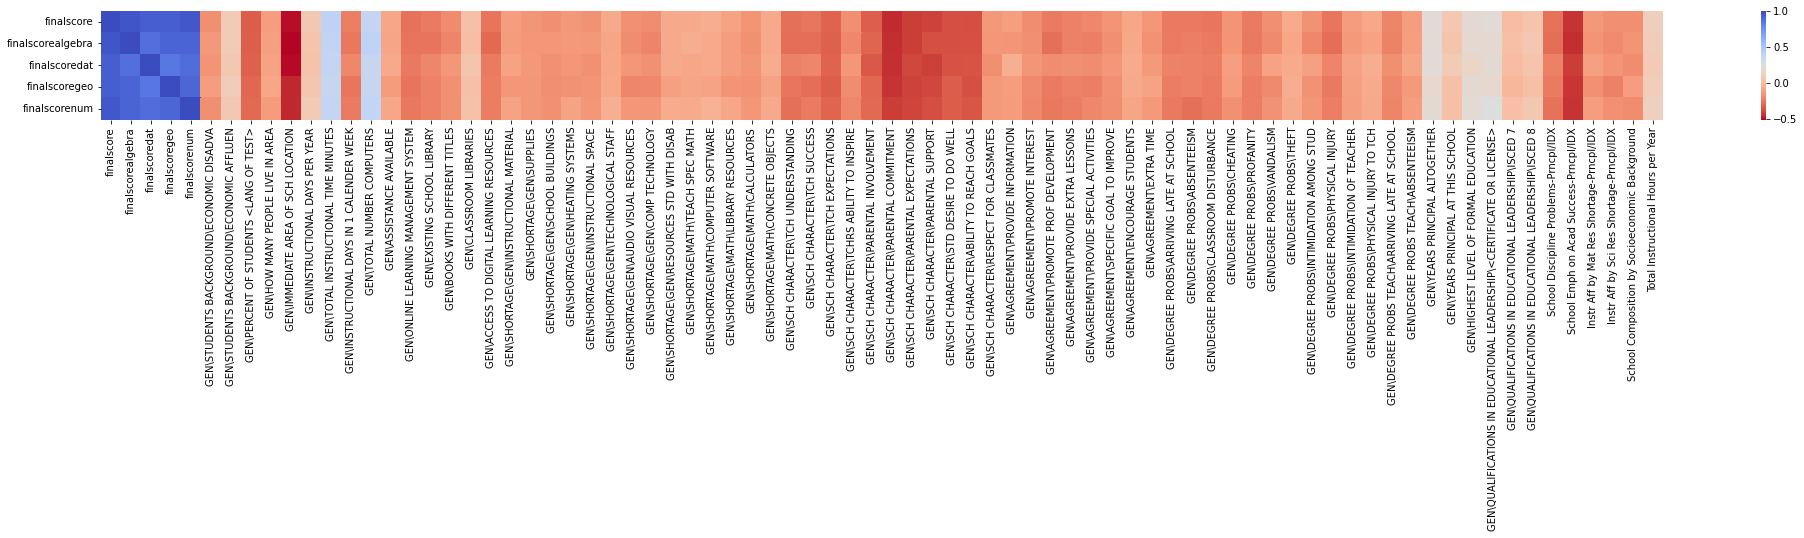

In [ ]:
# Correlation heatmap
plt.figure(figsize=(35, 2))
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size': 20})
plt.show()

Dividing the schools dataframe into train, test, features, and targets.

In [ ]:
X_sch = schools_nrm.loc[:, 'GEN\STUDENTS BACKGROUND\ECONOMIC DISADVA' : 'Total Instructional Hours per Year']
X_sch

,GEN\STUDENTS BACKGROUND\ECONOMIC DISADVA,GEN\STUDENTS BACKGROUND\ECONOMIC AFFLUEN,GEN\PERCENT OF STUDENTS <LANG OF TEST>,GEN\HOW MANY PEOPLE LIVE IN AREA,GEN\IMMEDIATE AREA OF SCH LOCATION,GEN\INSTRUCTIONAL DAYS PER YEAR,GEN\TOTAL INSTRUCTIONAL TIME MINUTES,GEN\INSTRUCTIONAL DAYS IN 1 CALENDER WEEK,GEN\TOTAL NUMBER COMPUTERS,GEN\ASSISTANCE AVAILABLE,...,GEN\HIGHEST LEVEL OF FORMAL EDUCATION,GEN\QUALIFICATIONS IN EDUCATIONAL LEADERSHIP\<CERTIFICATE OR LICENSE>,GEN\QUALIFICATIONS IN EDUCATIONAL LEADERSHIP\ISCED 7,GEN\QUALIFICATIONS IN EDUCATIONAL LEADERSHIP\ISCED 8,School Discipline Problems-Prncpl/IDX,School Emph on Acad Success-Prncpl/IDX,Instr Aff by Mat Res Shortage-Prncpl/IDX,Instr Aff by Sci Res Shortage-Prncpl/IDX,School Composition by Socioeconomic Background,Total Instructional Hours per Year
IDSCHOOL,,,,,,,,,,,,,,,,,,,,,
5001.0,-0.775831,0.306762,-0.873423,-0.330606,-1.334486,-0.021509,-0.058613,0.140535,-0.140728,-0.024225,...,1.197342,0.437382,-0.298066,-0.398045,0.591230,0.868714,-0.154713,-0.168603,-0.985303,-0.060645
5002.0,-1.573414,0.306762,-0.873423,-0.253477,-0.521226,-0.191722,-1.747884,0.140535,-0.721232,-0.024225,...,-0.631931,0.437382,-0.298066,-0.398045,0.591230,-0.917427,-0.154713,-0.168603,-0.985303,-0.382462
5003.0,0.819335,-0.140176,1.400578,0.132172,1.918554,-0.361936,-0.058613,0.140535,-0.721232,-0.024225,...,-0.631931,-0.721943,-0.298066,-0.398045,-0.994997,-0.917427,-0.154713,-0.168603,-0.017595,-0.201931
5004.0,0.819335,-0.587113,-0.873423,-0.022087,-0.521226,0.199769,0.786023,0.140535,-0.527731,-0.024225,...,-0.631931,-0.721943,-0.298066,-0.398045,0.591230,0.868714,-0.154713,-0.168603,-0.017595,0.174831
5005.0,0.021752,0.306762,0.832077,-0.330606,-0.521226,0.148705,1.630659,0.140535,-0.527731,4.639103,...,3.026615,-0.721943,-0.702847,-0.807249,0.591230,0.868714,-0.154713,-0.168603,-0.501449,0.292569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5216.0,-0.775831,0.306762,-0.873423,-0.330606,-1.334486,-0.191722,-0.058613,0.140535,0.246274,-0.690415,...,1.197342,-0.721943,-0.298066,-0.398045,2.177457,-0.917427,-0.154713,-0.168603,-0.985303,-0.131288
5217.0,0.819335,0.306762,-0.873423,-0.330606,-1.334486,0.148705,-0.058613,0.140535,0.826778,-0.690415,...,-0.631931,-0.721943,-0.298066,-0.398045,0.591230,-0.917427,-0.154713,-0.168603,-0.501449,0.009998
5218.0,0.819335,-0.587113,-0.873423,0.132172,1.105294,-0.378957,-0.058613,0.140535,-0.527731,-0.024225,...,-0.631931,0.437382,-0.298066,-0.398045,-0.994997,0.868714,-0.154713,-0.168603,-0.017595,-0.208995


In [ ]:
y_sch_finalscore = schools.loc[:, 'finalscore']
y_sch_algebra = schools.loc[:, 'finalscorealgebra']
y_sch_data_data = schools.loc[:, 'finalscoredat']
y_sch_data_geo = schools.loc[:, 'finalscoregeo']
y_sch_data_num = schools.loc[:, 'finalscorenum']

In [ ]:
from sklearn.model_selection import train_test_split

X_train_sch_final, X_test_sch_final, y_train_sch_final, y_test_sch_final = train_test_split(X_sch, y_sch_finalscore, test_size=0.4, random_state=101)
X_train_sch_alg, X_test_sch_alg, y_train_sch_alg, y_test_sch_alg = train_test_split(X_sch, y_sch_algebra, test_size=0.4, random_state=101)
X_train_sch_data, X_test_sch_data, y_train_sch_data, y_test_sch_data = train_test_split(X_sch, y_sch_data_data, test_size=0.4, random_state=101)
X_train_sch_geo, X_test_sch_geo, y_train_sch_geo, y_test_sch_geo = train_test_split(X_sch, y_sch_data_geo, test_size=0.4, random_state=101)
X_train_sch_num, X_test_sch_num, y_train_sch_num, y_test_sch_num = train_test_split(X_sch, y_sch_data_num, test_size=0.4, random_state=101)

We need to add a constant to our data so that we can ensure that model will be unbiased.

then we fit 5 models so we can predict the final scores and each different mathematical field with each model.

In [ ]:
import statsmodels.api as sm

# add constants so that the input matrices work with the statsmodels linear regression
X_train_sch_final = sm.add_constant(X_train_sch_final)
X_train_sch_alg = sm.add_constant(X_train_sch_alg)
X_train_sch_data = sm.add_constant(X_train_sch_data)
X_train_sch_geo = sm.add_constant(X_train_sch_geo)
X_train_sch_num = sm.add_constant(X_train_sch_num)

ls_sch_final = sm.OLS(y_train_sch_final, X_train_sch_final).fit()
ls_sch_alg = sm.OLS(y_train_sch_alg, X_train_sch_alg).fit()
ls_sch_data = sm.OLS(y_train_sch_data, X_train_sch_data).fit()
ls_sch_geo = sm.OLS(y_train_sch_geo, X_train_sch_geo).fit()
ls_sch_num = sm.OLS(y_train_sch_num, X_train_sch_num).fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


We make predictions of our targetted student score averages in each school to be used in visualization.

In [ ]:
x_matrix_sch_final = sm.add_constant(X_test_sch_final)

x_matrix_sch_alg = sm.add_constant(X_test_sch_alg)
x_matrix_sch_data = sm.add_constant(X_test_sch_data)
x_matrix_sch_geo = sm.add_constant(X_test_sch_geo)
x_matrix_sch_num = sm.add_constant(X_test_sch_num)

pred_school_final = ls_sch_final.predict(x_matrix_sch_final) # use the model to make predictions for all data in the test inputs
pred_CI_school_final = ls_sch_final.get_prediction(x_matrix_sch_final) # use the get_predictions model to construct an 80% confidence interval for the predictions
pred_CI_school_final = pred_CI_school_final.summary_frame(alpha=0.20)

pred_school_alg = ls_sch_alg.predict(x_matrix_sch_alg)
pred_CI_school_alg = ls_sch_alg.get_prediction(x_matrix_sch_alg).summary_frame(alpha=0.20)
pred_school_data = ls_sch_data.predict(x_matrix_sch_data)
pred_CI_school_data = ls_sch_data.get_prediction(x_matrix_sch_data).summary_frame(alpha=0.20)
pred_school_geo = ls_sch_geo.predict(x_matrix_sch_geo)
pred_CI_school_geo = ls_sch_geo.get_prediction(x_matrix_sch_geo).summary_frame(alpha=0.20)
pred_school_num = ls_sch_num.predict(x_matrix_sch_num)
pred_CI_school_num = ls_sch_num.get_prediction(x_matrix_sch_num).summary_frame(alpha=0.20)

Here we calculate the which features were the most important for our model to predict the mean scores using the coefficient of each feature.

In [ ]:
# calculating feature importance percentages based on linear regression coefficients.
feature_importance = pd.DataFrame(abs(pd.read_html(ls_sch_final.summary().tables[1].as_html(),header=0,index_col=0)[0]['coef']))
feature_importance.drop('const', inplace=True)
feature_importance = 100.0 * (feature_importance / feature_importance.sum())
feature_importance = feature_importance.sort_values(by='coef', ascending=False)
feature_importance.reset_index(inplace=True)
feature_importance.rename(columns={'index' : 'columns'}, inplace=True)
feature_importance[0:25]

,columns,coef
0,Total Instructional Hours per Year,37.290376
1,GEN\INSTRUCTIONAL DAYS PER YEAR,14.818652
2,GEN\TOTAL INSTRUCTIONAL TIME MINUTES,5.881767
3,GEN\BOOKS WITH DIFFERENT TITLES,3.162047
4,GEN\EXISTING SCHOOL LIBRARY,2.909668
5,GEN\QUALIFICATIONS IN EDUCATIONAL LEADERSHIP\I...,2.513831
6,GEN\QUALIFICATIONS IN EDUCATIONAL LEADERSHIP\I...,2.280048
7,GEN\DEGREE PROBS\PHYSICAL INJURY,1.697583
8,GEN\DEGREE PROBS\PHYSICAL INJURY TO TCH,1.293776
9,GEN\DEGREE PROBS TEACH\ABSENTEEISM,1.090544


We visualize the accuracy of our model in it's prediction.

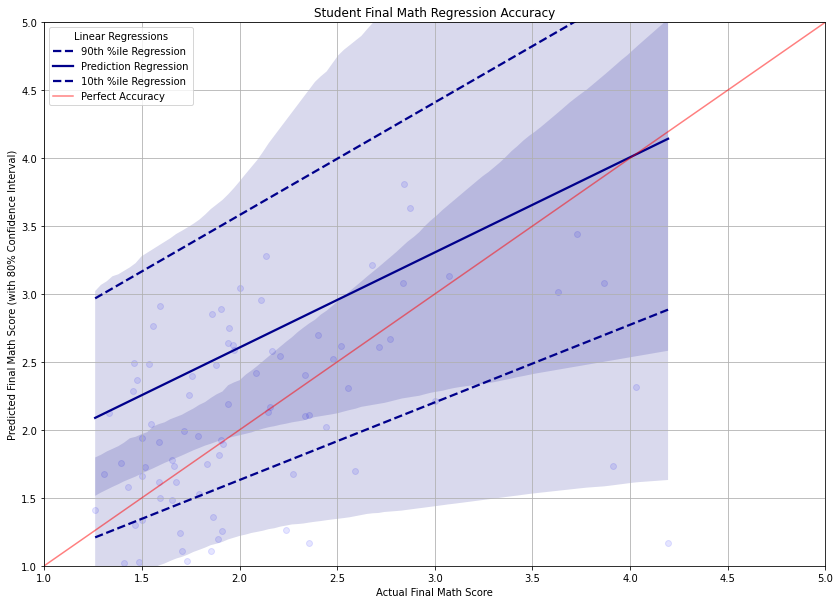

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Plotting regression accuracy.
plt.figure(figsize=(14,10))
plt.title('School Final Math Regression Accuracy')
sns.regplot(x=y_test_sch_final, y=pred_CI_school_final.obs_ci_upper.values, scatter_kws={'alpha':0.0}, line_kws={'linestyle':'--','color':'#00008B'}, ci = None);
sns.regplot(x=y_test_sch_final, y=pred_school_final, scatter_kws={'alpha':0.1, 'color':'blue'}, line_kws={'color':'#00008B'});
sns.regplot(x=y_test_sch_final, y=pred_CI_school_final.obs_ci_lower.values, scatter_kws={'alpha':0.0}, line_kws={'linestyle':'--','color':'#00008B'});
x=np.arange(1,6) # create a range of scores from 1-5; for some reason 1 to 6 draw line from 1 to 5? curious. :>
plt.plot(x,x,color='#FF0000',alpha=0.5); # plot the range of scores to represent 100% accuracy
plt.legend(['90th %ile Regression','Prediction Regression','10th %ile Regression','Perfect Accuracy'], title="Linear Regressions")
plt.xlabel('Actual Final Math Score')
plt.ylabel('Predicted Final Math Score (with 80% Confidence Interval)')
plt.grid(True)
plt.xlim(1,5) # Limit the plot to valid values
plt.ylim(1,5)
plt.show()

Visualization of the top 25 features in our model in percentages.

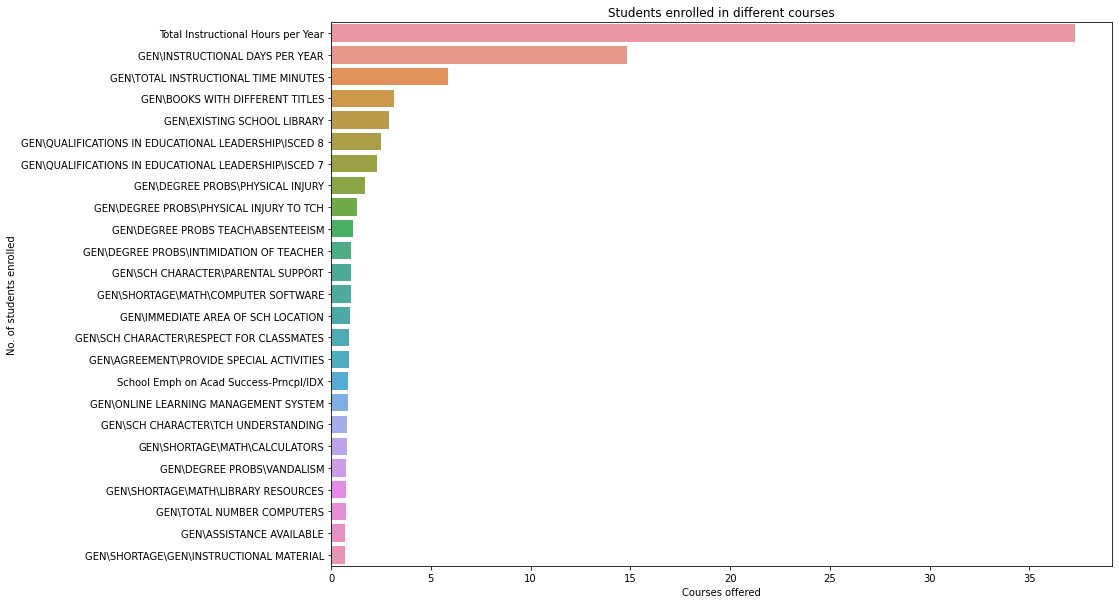

In [ ]:
# Feature correlation coefficient as calculated by linear regression
plt.figure(figsize=(14, 10))
sns.barplot(data=feature_importance[0:25], x='coef', y='columns')
plt.xlabel("Importance %")
plt.ylabel("Features")
plt.title("Importance of features of students in predicting final score")
plt.show()

### Different mathematical fields
algebra:

Now we do the same thing for each respective mathematical field.

In [ ]:
feature_importance = pd.DataFrame(abs(pd.read_html(ls_sch_alg.summary().tables[1].as_html(),header=0,index_col=0)[0]['coef']))
feature_importance.drop('const', inplace=True)
feature_importance = 100.0 * (feature_importance / feature_importance.sum())
feature_importance = feature_importance.sort_values(by='coef', ascending=False)
feature_importance.reset_index(inplace=True)
feature_importance.rename(columns={'index' : 'columns'}, inplace=True)
feature_importance[0:25]

,columns,coef
0,Total Instructional Hours per Year,32.020950
1,GEN\INSTRUCTIONAL DAYS PER YEAR,12.907125
2,GEN\TOTAL INSTRUCTIONAL TIME MINUTES,5.228732
3,GEN\BOOKS WITH DIFFERENT TITLES,3.793379
4,GEN\EXISTING SCHOOL LIBRARY,3.322564
5,GEN\DEGREE PROBS\PHYSICAL INJURY,2.286929
6,GEN\QUALIFICATIONS IN EDUCATIONAL LEADERSHIP\I...,1.574386
7,GEN\DEGREE PROBS\INTIMIDATION OF TEACHER,1.494601
8,GEN\DEGREE PROBS\PHYSICAL INJURY TO TCH,1.491441
9,GEN\QUALIFICATIONS IN EDUCATIONAL LEADERSHIP\I...,1.451153


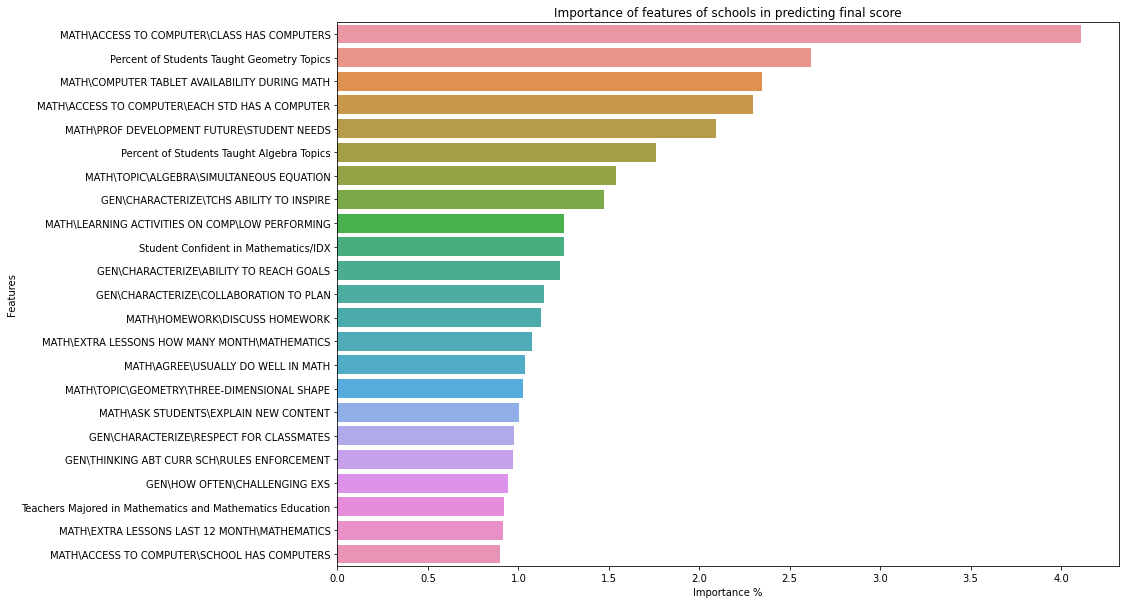

In [ ]:
plt.figure(figsize=(14, 10))
sns.barplot(data=feature_importance[0:25], x='coef', y='columns')
plt.xlabel("Importance %")
plt.ylabel("Features")
plt.title("Importance of features of schools in predicting final algebra score")
plt.show()

Data:

In [ ]:
feature_importance = pd.DataFrame(abs(pd.read_html(ls_sch_data.summary().tables[1].as_html(),header=0,index_col=0)[0]['coef']))
feature_importance.drop('const', inplace=True)
feature_importance = 100.0 * (feature_importance / feature_importance.sum())
feature_importance = feature_importance.sort_values(by='coef', ascending=False)
feature_importance.reset_index(inplace=True)
feature_importance.rename(columns={'index' : 'columns'}, inplace=True)
feature_importance[0:25]

,columns,coef
0,Total Instructional Hours per Year,37.764779
1,GEN\INSTRUCTIONAL DAYS PER YEAR,15.163115
2,GEN\TOTAL INSTRUCTIONAL TIME MINUTES,5.763317
3,GEN\QUALIFICATIONS IN EDUCATIONAL LEADERSHIP\I...,2.349412
4,GEN\BOOKS WITH DIFFERENT TITLES,2.197802
5,GEN\QUALIFICATIONS IN EDUCATIONAL LEADERSHIP\I...,2.040816
6,GEN\EXISTING SCHOOL LIBRARY,1.869852
7,GEN\DEGREE PROBS\VANDALISM,1.556956
8,GEN\DEGREE PROBS\PHYSICAL INJURY,1.454807
9,GEN\SHORTAGE\MATH\COMPUTER SOFTWARE,1.387067


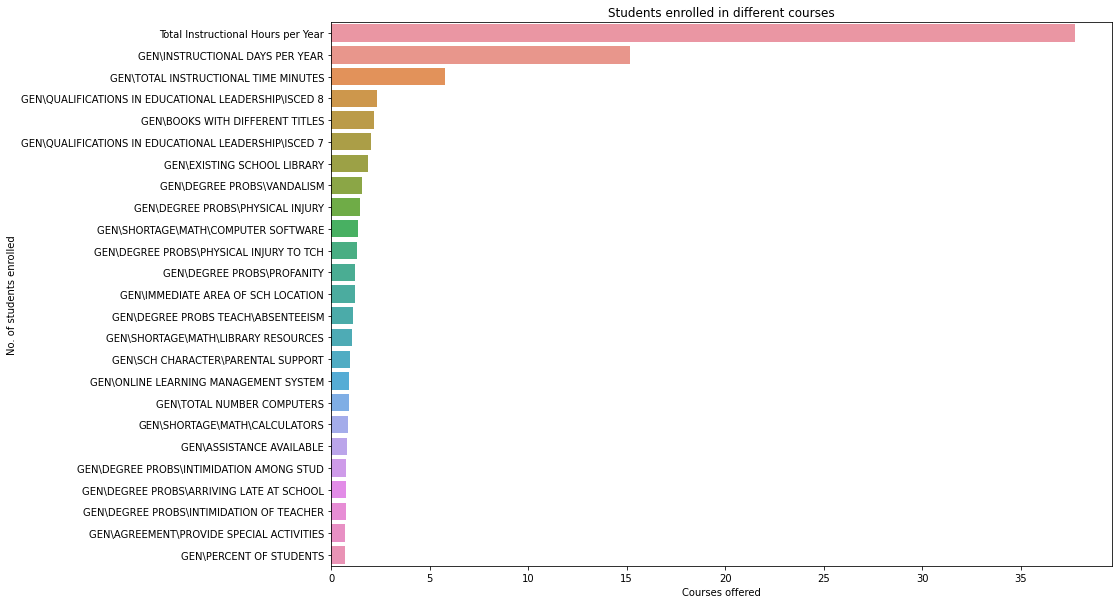

In [ ]:
plt.figure(figsize=(14, 10))
sns.barplot(data=feature_importance[0:25], x='coef', y='columns')
plt.xlabel("Importance %")
plt.ylabel("Features")
plt.title("Importance of features of students in predicting final data score")
plt.show()

Geo:

In [ ]:
feature_importance = pd.DataFrame(abs(pd.read_html(ls_sch_geo.summary().tables[1].as_html(),header=0,index_col=0)[0]['coef']))
feature_importance.drop('const', inplace=True)
feature_importance = 100.0 * (feature_importance / feature_importance.sum())
feature_importance = feature_importance.sort_values(by='coef', ascending=False)
feature_importance.reset_index(inplace=True)
feature_importance.rename(columns={'index' : 'columns'}, inplace=True)
feature_importance[0:25]

,columns,coef
0,Total Instructional Hours per Year,33.194393
1,GEN\INSTRUCTIONAL DAYS PER YEAR,13.325394
2,GEN\TOTAL INSTRUCTIONAL TIME MINUTES,5.442812
3,GEN\BOOKS WITH DIFFERENT TITLES,2.919356
4,GEN\EXISTING SCHOOL LIBRARY,2.526675
5,GEN\DEGREE PROBS\PHYSICAL INJURY,1.852358
6,GEN\DEGREE PROBS\INTIMIDATION OF TEACHER,1.684986
7,GEN\DEGREE PROBS\PHYSICAL INJURY TO TCH,1.670502
8,School Discipline Problems-Prncpl/IDX,1.630269
9,GEN\ASSISTANCE AVAILABLE,1.379210


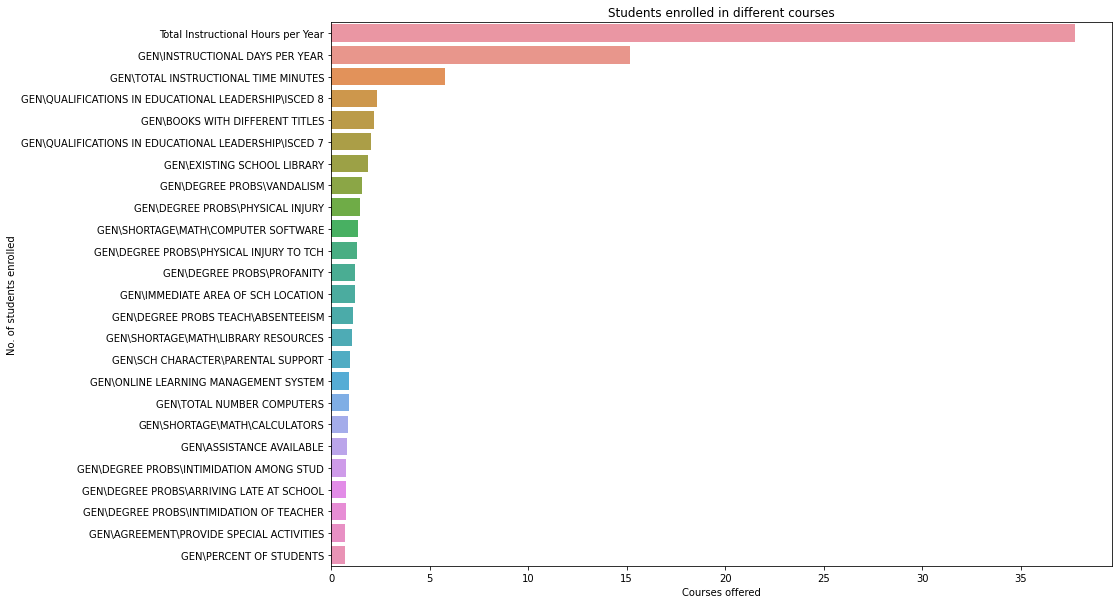

In [ ]:
plt.figure(figsize=(14, 10))
sns.barplot(data=feature_importance[0:25], x='coef', y='columns')
plt.xlabel("Importance %")
plt.ylabel("Features")
plt.title("Importance of features of students in predicting final geo score")
plt.show()

Numbers:

In [ ]:
feature_importance = pd.DataFrame(abs(pd.read_html(ls_sch_num.summary().tables[1].as_html(),header=0,index_col=0)[0]['coef']))
feature_importance.drop('const', inplace=True)
feature_importance = 100.0 * (feature_importance / feature_importance.sum())
feature_importance = feature_importance.sort_values(by='coef', ascending=False)
feature_importance.reset_index(inplace=True)
feature_importance.rename(columns={'index' : 'columns'}, inplace=True)
feature_importance[0:25]

,columns,coef
0,Total Instructional Hours per Year,36.123908
1,GEN\INSTRUCTIONAL DAYS PER YEAR,14.052580
2,GEN\TOTAL INSTRUCTIONAL TIME MINUTES,5.903184
3,GEN\BOOKS WITH DIFFERENT TITLES,3.111463
4,GEN\EXISTING SCHOOL LIBRARY,2.868505
5,GEN\QUALIFICATIONS IN EDUCATIONAL LEADERSHIP\I...,1.754567
6,GEN\QUALIFICATIONS IN EDUCATIONAL LEADERSHIP\I...,1.688097
7,GEN\DEGREE PROBS\PHYSICAL INJURY,1.450870
8,GEN\DEGREE PROBS\PHYSICAL INJURY TO TCH,1.418781
9,School Emph on Acad Success-Prncpl/IDX,1.339705


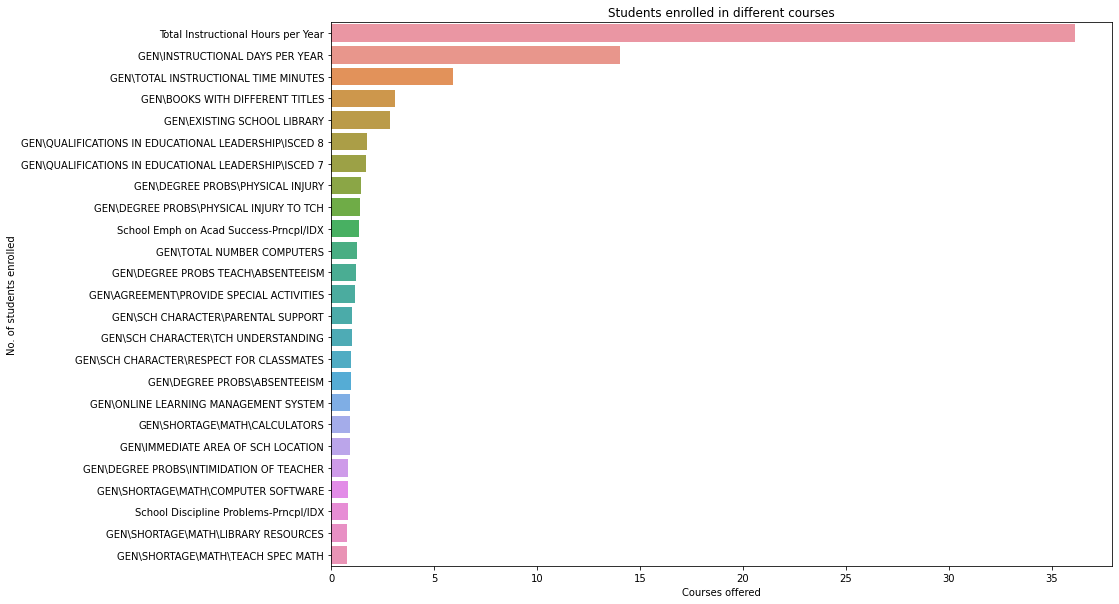

In [ ]:
plt.figure(figsize=(14, 10))
sns.barplot(data=feature_importance[0:25], x='coef', y='columns')
plt.xlabel("Importance %")
plt.ylabel("Features")
plt.title("Importance of features of students in predicting final numbers score")
plt.show()

### Observations:
We can see that in different fields and the final score the most important features seem to be `Instructional time spent` and `The qualifications of instructors`.

And different subject seem to have low effects on the features except for `Algebra` in which `Geometry subjects` and `availability of computers` seem to have affect the scores while they seem to be less important in other fields.

### Correlations for `students'` features

Here again we use pandas correlation to find a basis of which features in students seem to affect their scores.

In [ ]:
# Correlations as calculated by pandas
corr = students_nrm.corr()[0:5]
corr

,finalscore,finalscorealgebra,finalscoredat,finalscoregeo,finalscorenum,GEN\SEX OF STUDENT,GEN\OFTEN SPEAK <LANG OF TEST> AT HOME,GEN\AMOUNT OF BOOKS IN YOUR HOME,GEN\HOME POSSESS\COMPUTER TABLET,GEN\HOME POSSESS\STUDY DESK,...,MATH\<PROF DEVELOPMENT> HOURS,School Emph on Acad Success-Tchr/IDX,Teaching Limited by Student Needs/IDX,Safe and Orderly Schools-Tchr/IDX,Teachers Job Satisfaction/IDX,Teachers Majored in Mathematics and Mathematics Education,Percent of Students Taught Number Topics,Percent of Students Taught Algebra Topics,Percent of Students Taught Geometry Topics,Percent of Students Taught Data/Probability Topics
finalscore,1.000000,0.744724,0.591161,0.594150,0.725995,-0.011454,-0.166536,0.317484,-0.165556,-0.183733,...,-0.023327,-0.217017,-0.128658,-0.081895,0.010515,0.025084,-0.015653,0.000010,-0.004480,0.003171
finalscorealgebra,0.744724,1.000000,0.361966,0.383436,0.531658,-0.057022,-0.142900,0.257826,-0.143319,-0.160996,...,-0.026649,-0.176551,-0.110741,-0.065644,-0.012650,0.008511,-0.013676,0.011977,0.009150,0.012483
finalscoredat,0.591161,0.361966,1.000000,0.189091,0.301990,0.007673,-0.099487,0.195023,-0.100128,-0.113549,...,0.000886,-0.126324,-0.075025,-0.047699,0.014006,0.026194,-0.016473,-0.000840,-0.001175,0.003507
finalscoregeo,0.594150,0.383436,0.189091,1.000000,0.494505,-0.012213,-0.090064,0.189618,-0.095744,-0.103359,...,-0.023842,-0.120979,-0.074467,-0.057572,0.007563,0.015300,-0.019877,-0.015700,-0.017996,-0.015159
finalscorenum,0.725995,0.531658,0.301990,0.494505,1.000000,0.025622,-0.110643,0.269557,-0.128310,-0.134465,...,-0.024460,-0.180605,-0.120648,-0.063424,0.010206,0.024912,-0.009650,-0.007917,-0.015643,-0.001479


Visualize it using a heatmap.

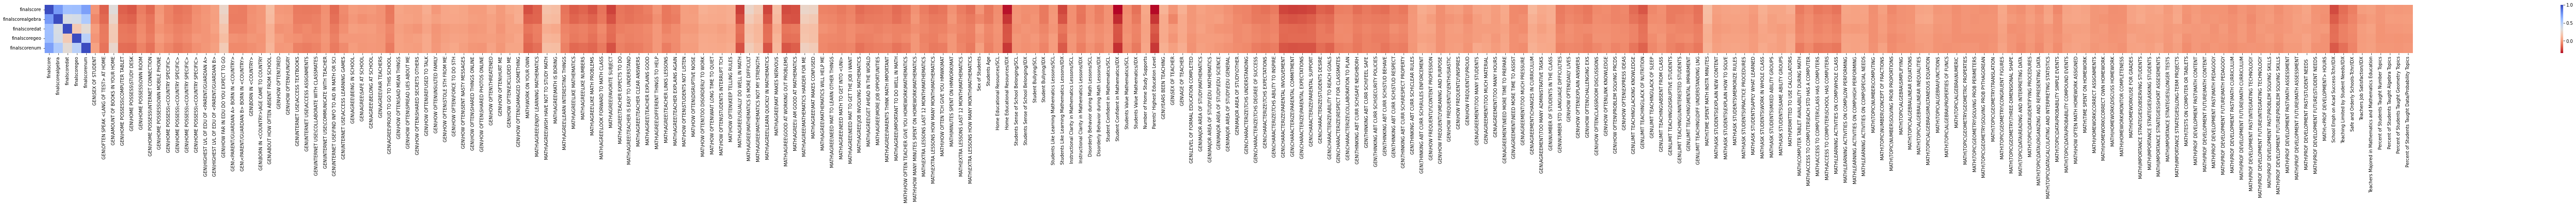

In [ ]:
# Correlation heatmap
plt.figure(figsize=(120, 2))
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size': 20})
plt.show()

Divide the dataframe into train, test, features, and target values.

The training of the model is done in the same way as schools so it wont be discussed.

In [ ]:
X_stu = students_nrm.loc[:, 'GEN\SEX OF STUDENT' : 'Percent of Students Taught Data/Probability Topics']
X_stu

GEN\SEX OF STUDENT  \
IDSCHOOL IDSTUD                           
5003.0   50030107.0            0.982823   
5004.0   50040110.0            0.982823   
         50040124.0            0.982823   
5005.0   50050101.0           -1.017648   
         50050115.0           -1.017648   
...                                 ...   
5218.0   52180101.0            0.982823   
5219.0   52190109.0           -1.017648   
         52190123.0           -1.017648   
5220.0   52200113.0            0.982823   
         52200127.0            0.982823   

                     GEN\OFTEN SPEAK <LANG OF TEST> AT HOME  \
IDSCHOOL IDSTUD                                               
5003.0   50030107.0                                2.083733   
5004.0   50040110.0                                2.083733   
         50040124.0                               -0.745837   
5005.0   50050101.0                               -0.745837   
         50050115.0                               -0.745837   
...                                                     ...   
5218.0   52180101.0                                0.197353   
5219.0   52190109.0                                2.083733   
         52190123.0                                1.140543   
5220.0   52200113.0                               -0.745837   
         52200127.0                                1.140543   

                     GEN\AMOUNT OF BOOKS IN YOUR HOME  \
IDSCHOOL IDSTUD                                         
5003.0   50030107.0                          0.561073   
5004.0   50040110.0                         -0.254264   
         50040124.0                         -0.254264   
5005.0   50050101.0                         -1.069600   
         50050115.0                         -1.069600   
...                                               ...   
5218.0   52180101.0                         -0.254264   
5219.0   52190109.0                         -1.069600   
         52190123.0                         -0.254264   
5220.0   52200113.0                          2.191746   
         52200127.0                          2.191746   

                     GEN\HOME POSSESS\COMPUTER TABLET  \
IDSCHOOL IDSTUD                                         
5003.0   50030107.0                          1.002753   
5004.0   50040110.0                         -0.404777   
         50040124.0                         -0.404777   
5005.0   50050101.0                          1.002753   
         50050115.0                         -0.404777   
...                                               ...   
5218.0   52180101.0                          1.002753   
5219.0   52190109.0                          1.002753   
         52190123.0                         -0.404777   
5220.0   52200113.0                         -0.404777   
         52200127.0                          1.002753   

                     GEN\HOME POSSESS\STUDY DESK  GEN\HOME POSSESS\OWN ROOM  \
IDSCHOOL IDSTUD                                                               
5003.0   50030107.0                     0.760381                  -0.494074   
5004.0   50040110.0                    -0.496889                   0.784227   
         50040124.0                     0.760381                   0.784227   
5005.0   50050101.0                     0.760381                  -0.494074   
         50050115.0                    -0.496889                  -0.494074   
...                                          ...                        ...   
5218.0   52180101.0                     0.760381                  -0.494074   
5219.0   52190109.0                    -0.496889                  -0.494074   
         52190123.0                     0.760381                   0.784227   
5220.0   52200113.0                    -0.496889                  -0.494074   
         52200127.0                    -0.496889                  -0.494074   

                     GEN\HOME POSSESS\INTERNET CONNECTION  \
IDSCHOOL IDSTUD                                             
5003.0 

In [ ]:
y_stu_finalscore = students_nrm.loc[:, 'finalscore']
y_stu_algebra = students_nrm.loc[:, 'finalscorealgebra']
y_stu_data = students_nrm.loc[:, 'finalscoredat']
y_stu_geo = students_nrm.loc[:, 'finalscoregeo']
y_stu_num = students_nrm.loc[:, 'finalscorenum']

In [ ]:
X_train_stu_final, X_test_stu_final, y_train_stu_final, y_test_stu_final = train_test_split(X_stu, y_stu_finalscore, test_size=0.4, random_state=101)
X_train_stu_alg, X_test_stu_alg, y_train_stu_alg, y_test_stu_alg = train_test_split(X_stu, y_stu_algebra, test_size=0.4, random_state=101)
X_train_stu_data, X_test_stu_data, y_train_stu_data, y_test_stu_data = train_test_split(X_stu, y_stu_data, test_size=0.4, random_state=101)
X_train_stu_geo, X_test_stu_geo, y_train_stu_geo, y_test_stu_geo = train_test_split(X_stu, y_stu_geo, test_size=0.4, random_state=101)
X_train_stu_num, X_test_stu_num, y_train_stu_num, y_test_stu_num = train_test_split(X_stu, y_stu_num, test_size=0.4, random_state=101)

In [ ]:
# add constants so that the input matrices work with the statsmodels linear regression
X_train_stu_final = sm.add_constant(X_train_stu_final)
X_train_stu_alg = sm.add_constant(X_train_stu_alg)
X_train_stu_data = sm.add_constant(X_train_stu_data)
X_train_stu_geo = sm.add_constant(X_train_stu_geo)
X_train_stu_num = sm.add_constant(X_train_stu_num)

ls_stu_final = sm.OLS(y_train_stu_final, X_train_stu_final).fit()
ls_stu_alg = sm.OLS(y_train_stu_alg, X_train_stu_alg).fit()
ls_stu_data = sm.OLS(y_train_stu_data, X_train_stu_data).fit()
ls_stu_geo = sm.OLS(y_train_stu_geo, X_train_stu_geo).fit()
ls_stu_num = sm.OLS(y_train_stu_num, X_train_stu_num).fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
x_matrix_stu_final = sm.add_constant(X_test_stu_final)

x_matrix_stu_alg = sm.add_constant(X_test_stu_alg)
x_matrix_stu_data = sm.add_constant(X_test_stu_data)
x_matrix_stu_geo = sm.add_constant(X_test_stu_geo)
x_matrix_stu_num = sm.add_constant(X_test_stu_num)

pred_student_final = ls_stu_final.predict(x_matrix_stu_final) # use the model to make predictions for all data in the test inputs
pred_CI_student_final = ls_stu_final.get_prediction(x_matrix_stu_final) # use the get_predictions model to construct an 80% confidence interval for the predictions
pred_CI_student_final = pred_CI_student_final.summary_frame(alpha=0.20)

pred_student_alg = ls_stu_alg.predict(x_matrix_stu_alg)
pred_CI_student_alg = ls_stu_alg.get_prediction(x_matrix_stu_alg).summary_frame(alpha=0.20)
pred_student_data = ls_stu_data.predict(x_matrix_stu_data)
pred_CI_student_data = ls_stu_data.get_prediction(x_matrix_stu_data).summary_frame(alpha=0.20)
pred_student_geo = ls_stu_geo.predict(x_matrix_stu_geo)
pred_CI_student_geo = ls_stu_geo.get_prediction(x_matrix_stu_geo).summary_frame(alpha=0.20)
pred_student_num = ls_stu_num.predict(x_matrix_stu_num)
pred_CI_student_num = ls_stu_num.get_prediction(x_matrix_stu_num).summary_frame(alpha=0.20)

Here again we calculate how big of an effect in percentages each feature had in prediction of each student's final scores.

In [ ]:
# calculating feature importance percentages based on linear regression coefficients.
feature_importance = pd.DataFrame(abs(pd.read_html(ls_stu_final.summary().tables[1].as_html(),header=0,index_col=0)[0]['coef']))
feature_importance.drop('const', inplace=True)
feature_importance = 100.0 * (feature_importance / feature_importance.sum())
feature_importance = feature_importance.sort_values(by='coef', ascending=False)
feature_importance.reset_index(inplace=True)
feature_importance.rename(columns={'index' : 'columns'}, inplace=True)
feature_importance[0:50]

,columns,coef
0,MATH\ACCESS TO COMPUTER\CLASS HAS COMPUTERS,4.113067
1,Percent of Students Taught Geometry Topics,2.619531
2,MATH\COMPUTER TABLET AVAILABILITY DURING MATH,2.345488
3,MATH\ACCESS TO COMPUTER\EACH STD HAS A COMPUTER,2.297933
4,MATH\PROF DEVELOPMENT FUTURE\STUDENT NEEDS,2.090789
5,Percent of Students Taught Algebra Topics,1.761131
6,MATH\TOPIC\ALGEBRA\SIMULTANEOUS EQUATION,1.540284
7,GEN\CHARACTERIZE\TCHS ABILITY TO INSPIRE,1.471774
8,MATH\LEARNING ACTIVITIES ON COMP\LOW PERFORMING,1.251733
9,Student Confident in Mathematics/IDX,1.251733


Visualize the accuracy of our model.

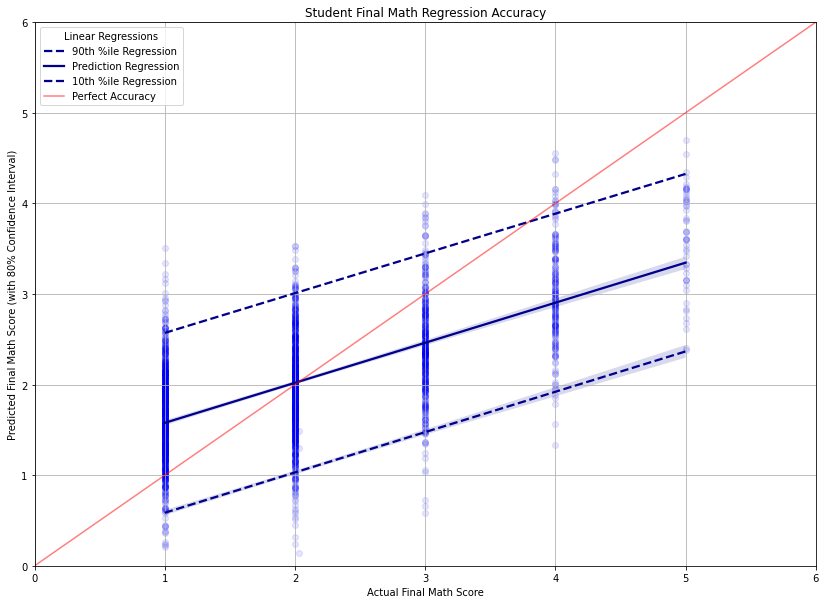

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Plotting regression accuracy.
plt.figure(figsize=(14,10))
plt.title('Student Final Math Regression Accuracy')
sns.regplot(x=y_test_stu_final, y=pred_CI_student_final.obs_ci_upper.values, scatter_kws={'alpha':0.0}, line_kws={'linestyle':'--','color':'#00008B'}, ci = None);
sns.regplot(x=y_test_stu_final, y=pred_student_final, scatter_kws={'alpha':0.1, 'color':'blue'}, line_kws={'color':'#00008B'});
sns.regplot(x=y_test_stu_final, y=pred_CI_student_final.obs_ci_lower.values, scatter_kws={'alpha':0.0}, line_kws={'linestyle':'--','color':'#00008B'});
x=np.arange(0,7) # create a range of scores from 1-5; for some reason 1 to 6 draw line from 1 to 5? curious. :>
plt.plot(x,x,color='#FF0000',alpha=0.5); # plot the range of scores to represent 100% accuracy
plt.legend(['90th %ile Regression','Prediction Regression','10th %ile Regression','Perfect Accuracy'], title="Linear Regressions")
plt.xlabel('Actual Final Math Score')
plt.ylabel('Predicted Final Math Score (with 80% Confidence Interval)')
plt.grid(True)
plt.xlim(0,6) # Limit the plot to valid values
plt.ylim(0,6)
plt.show()

Visualize the top 50 most important features in our model.

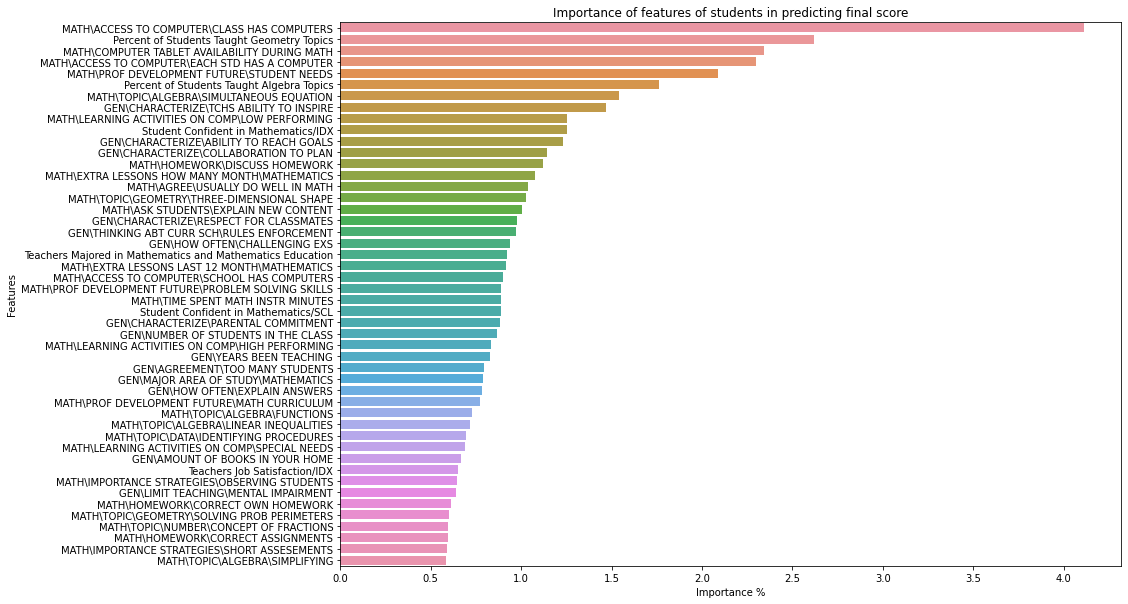

In [ ]:
# Features importance based on coefficient as calculated by linear regression
plt.figure(figsize=(14, 10))
sns.barplot(data=feature_importance[0:50], x='coef', y='columns')
plt.xlabel("Importance %")
plt.ylabel("Features")
plt.title("Importance of features of students in predicting final score")
plt.show()

And do the same for each respective mathematical field.

Algebra:

In [ ]:
# calculating feature importance percentages based on linear regression coefficients.
feature_importance = pd.DataFrame(abs(pd.read_html(ls_stu_alg.summary().tables[1].as_html(),header=0,index_col=0)[0]['coef']))
feature_importance.drop('const', inplace=True)
feature_importance = 100.0 * (feature_importance / feature_importance.sum())
feature_importance = feature_importance.sort_values(by='coef', ascending=False)
feature_importance.reset_index(inplace=True)
feature_importance.rename(columns={'index' : 'columns'}, inplace=True)
feature_importance[0:50]

,columns,coef
0,MATH\ACCESS TO COMPUTER\CLASS HAS COMPUTERS,4.828589
1,MATH\ACCESS TO COMPUTER\EACH STD HAS A COMPUTER,2.796786
2,Percent of Students Taught Geometry Topics,2.427367
3,MATH\PROF DEVELOPMENT FUTURE\STUDENT NEEDS,2.247719
4,MATH\LEARNING ACTIVITIES ON COMP\LOW PERFORMING,2.111084
5,MATH\LEARNING ACTIVITIES ON COMP\SPECIAL NEEDS,1.933966
6,MATH\COMPUTER TABLET AVAILABILITY DURING MATH,1.704555
7,MATH\TOPIC\ALGEBRA\SIMULTANEOUS EQUATION,1.675035
8,MATH\PROF DEVELOPMENT FUTURE\MATH CURRICULUM,1.471771
9,Student Confident in Mathematics/IDX,1.387429


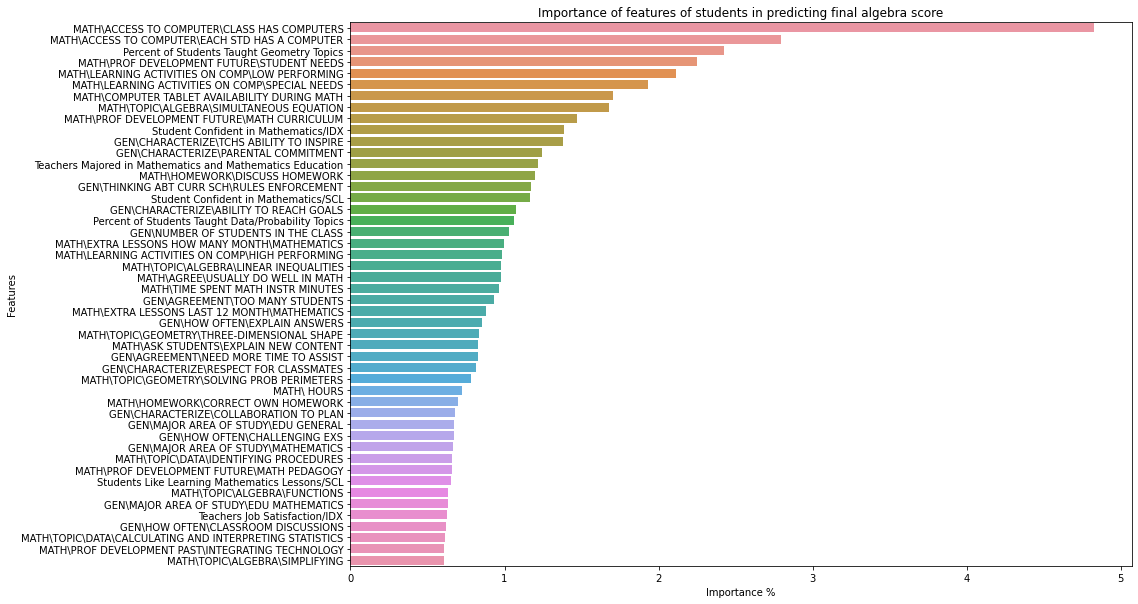

In [ ]:
# Features importance based on coefficient as calculated by linear regression
plt.figure(figsize=(14, 10))
sns.barplot(data=feature_importance[0:50], x='coef', y='columns')
plt.xlabel("Importance %")
plt.ylabel("Features")
plt.title("Importance of features of students in predicting final algebra score")
plt.show()

Data:

In [ ]:
# calculating feature importance percentages based on linear regression coefficients.
feature_importance = pd.DataFrame(abs(pd.read_html(ls_stu_data.summary().tables[1].as_html(),header=0,index_col=0)[0]['coef']))
feature_importance.drop('const', inplace=True)
feature_importance = 100.0 * (feature_importance / feature_importance.sum())
feature_importance = feature_importance.sort_values(by='coef', ascending=False)
feature_importance.reset_index(inplace=True)
feature_importance.rename(columns={'index' : 'columns'}, inplace=True)
feature_importance[0:50]

,columns,coef
0,Percent of Students Taught Algebra Topics,2.360481
1,Percent of Students Taught Geometry Topics,1.868523
2,MATH\COMPUTER TABLET AVAILABILITY DURING MATH,1.771051
3,MATH\PROF DEVELOPMENT FUTURE\PROBLEM SOLVING S...,1.634958
4,GEN\CHARACTERIZE\ABILITY TO REACH GOALS,1.579785
5,GEN\CHARACTERIZE\TCHS ABILITY TO INSPIRE,1.527370
6,GEN\CHARACTERIZE\RESPECT FOR CLASSMATES,1.366449
7,Student Confident in Mathematics/IDX,1.339782
8,MATH\PROF DEVELOPMENT FUTURE\STUDENT NEEDS,1.328748
9,MATH\HOMEWORK\DISCUSS HOMEWORK,1.287368


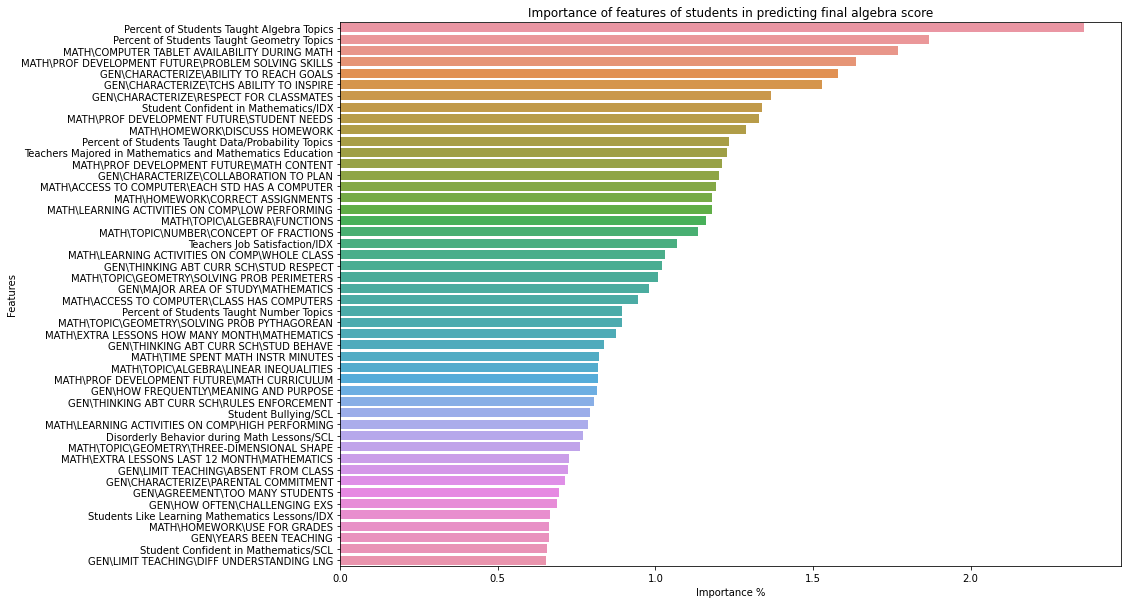

In [ ]:
# Features importance based on coefficient as calculated by linear regression
plt.figure(figsize=(14, 10))
sns.barplot(data=feature_importance[0:50], x='coef', y='columns')
plt.xlabel("Importance %")
plt.ylabel("Features")
plt.title("Importance of features of students in predicting final data score")
plt.show()

Geo:

In [ ]:
# calculating feature importance percentages based on linear regression coefficients.
feature_importance = pd.DataFrame(abs(pd.read_html(ls_stu_geo.summary().tables[1].as_html(),header=0,index_col=0)[0]['coef']))
feature_importance.drop('const', inplace=True)
feature_importance = 100.0 * (feature_importance / feature_importance.sum())
feature_importance = feature_importance.sort_values(by='coef', ascending=False)
feature_importance.reset_index(inplace=True)
feature_importance.rename(columns={'index' : 'columns'}, inplace=True)
feature_importance[0:50]

,columns,coef
0,MATH\ACCESS TO COMPUTER\CLASS HAS COMPUTERS,2.859118
1,MATH\PROF DEVELOPMENT FUTURE\STUDENT NEEDS,2.348920
2,MATH\COMPUTER TABLET AVAILABILITY DURING MATH,2.240001
3,Percent of Students Taught Geometry Topics,1.808625
4,Percent of Students Taught Algebra Topics,1.762765
5,GEN\HOW OFTEN\CHALLENGING EXS,1.401613
6,MATH\PROF DEVELOPMENT FUTURE\PROBLEM SOLVING S...,1.380116
7,MATH\ACCESS TO COMPUTER\EACH STD HAS A COMPUTER,1.377250
8,MATH\TOPIC\ALGEBRA\SIMULTANEOUS EQUATION,1.354319
9,MATH\PROF DEVELOPMENT FUTURE\INTEGRATING TECHN...,1.307026


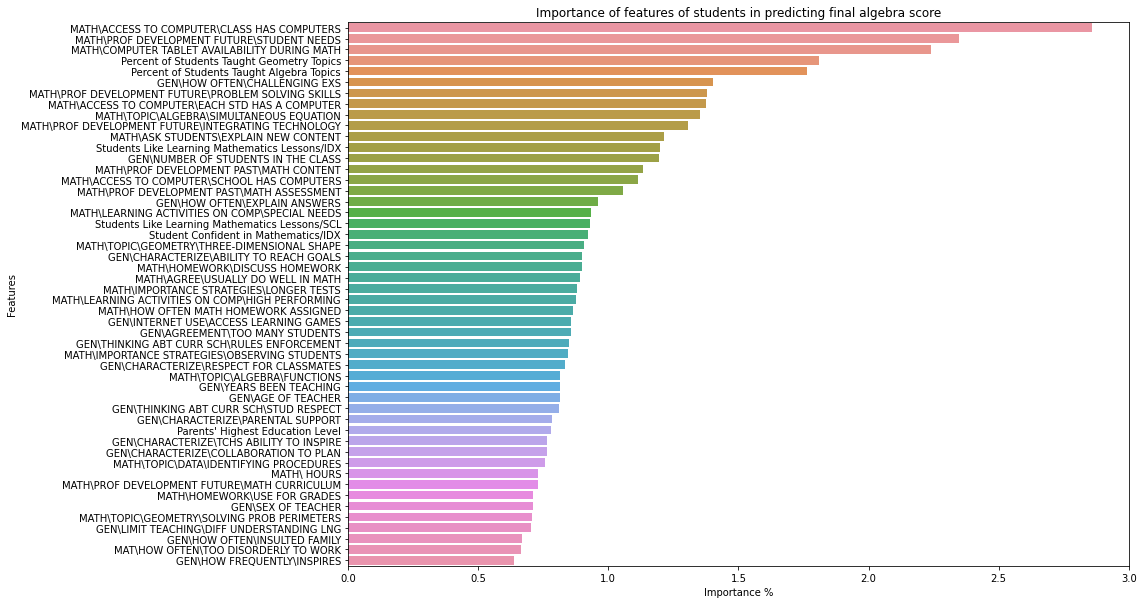

In [ ]:
# Features importance based on coefficient as calculated by linear regression
plt.figure(figsize=(14, 10))
sns.barplot(data=feature_importance[0:50], x='coef', y='columns')
plt.xlabel("Importance %")
plt.ylabel("Features")
plt.title("Importance of features of students in predicting final geo score")
plt.show()

Numbers:

In [ ]:
# calculating feature importance percentages based on linear regression coefficients.
feature_importance = pd.DataFrame(abs(pd.read_html(ls_stu_num.summary().tables[1].as_html(),header=0,index_col=0)[0]['coef']))
feature_importance.drop('const', inplace=True)
feature_importance = 100.0 * (feature_importance / feature_importance.sum())
feature_importance = feature_importance.sort_values(by='coef', ascending=False)
feature_importance.reset_index(inplace=True)
feature_importance.rename(columns={'index' : 'columns'}, inplace=True)
feature_importance[0:50]

,columns,coef
0,MATH\ACCESS TO COMPUTER\CLASS HAS COMPUTERS,5.134520
1,MATH\COMPUTER TABLET AVAILABILITY DURING MATH,3.005917
2,MATH\ACCESS TO COMPUTER\EACH STD HAS A COMPUTER,2.510811
3,Percent of Students Taught Geometry Topics,2.381448
4,MATH\LEARNING ACTIVITIES ON COMP\SPECIAL NEEDS,2.006297
5,MATH\LEARNING ACTIVITIES ON COMP\HIGH PERFORMING,1.721699
6,MATH\TOPIC\ALGEBRA\SIMULTANEOUS EQUATION,1.665250
7,MATH\LEARNING ACTIVITIES ON COMP\LOW PERFORMING,1.557056
8,MATH\LEARNING ACTIVITIES ON COMP\WHOLE CLASS,1.506486
9,GEN\CHARACTERIZE\ABILITY TO REACH GOALS,1.306562


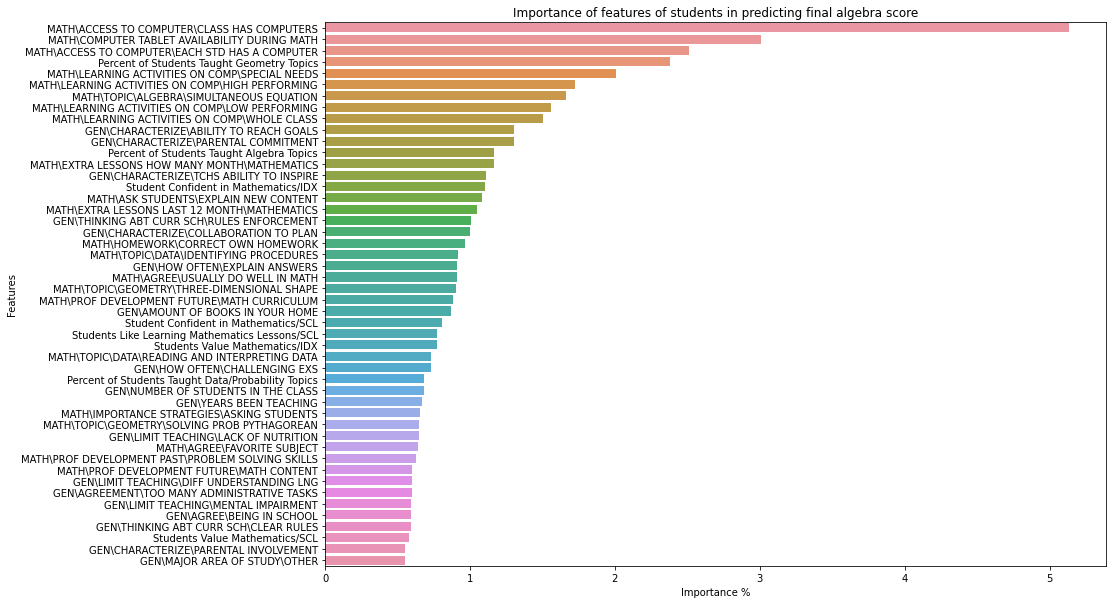

In [ ]:
# Features importance based on coefficient as calculated by linear regression
plt.figure(figsize=(14, 10))
sns.barplot(data=feature_importance[0:50], x='coef', y='columns')
plt.xlabel("Importance %")
plt.ylabel("Features")
plt.title("Importance of features of students in predicting final algebra score")
plt.show()

### Observations:
We can see that in different fields and the final score the most important features for each student seem to be `Access to computers`, `Class activities` and `Their home environment` .

And different subject seem to have low effects on the features except for `Algebra` in which `Geometry subjects` and `Algebra subjects` taught seem to have large effects which is predictable since they are in the same field.

### Gender influence

Now we train our model on different genders to see if it is important when considering which features affect the score of our students.

In [ ]:
X_female_stu = female_students_nrm.loc[:, 'GEN\OFTEN SPEAK <LANG OF TEST> AT HOME' : 'Percent of Students Taught Data/Probability Topics']
X_male_stu = male_students_nrm.loc[:, 'GEN\OFTEN SPEAK <LANG OF TEST> AT HOME' : 'Percent of Students Taught Data/Probability Topics']

In [ ]:
X_female_stu

GEN\OFTEN SPEAK <LANG OF TEST> AT HOME  \
IDSCHOOL IDSTUD                                               
5005.0   50050101.0                               -0.668614   
         50050115.0                               -0.668614   
         50050129.0                                0.379107   
5008.0   50080107.0                                1.426828   
5009.0   50090114.0                                2.474549   
...                                                     ...   
5215.0   52150519.0                                1.426828   
5217.0   52170203.0                               -0.668614   
         52170217.0                               -0.668614   
5219.0   52190109.0                                2.474549   
         52190123.0                                1.426828   

                     GEN\AMOUNT OF BOOKS IN YOUR HOME  \
IDSCHOOL IDSTUD                                         
5005.0   50050101.0                         -1.101472   
         50050115.0                         -1.101472   
         50050129.0                          2.245132   
5008.0   50080107.0                         -1.101472   
5009.0   50090114.0                         -0.264821   
...                                               ...   
5215.0   52150519.0                          0.571830   
5217.0   52170203.0                         -0.264821   
         52170217.0                         -1.101472   
5219.0   52190109.0                         -1.101472   
         52190123.0                         -0.264821   

                     GEN\HOME POSSESS\COMPUTER TABLET  \
IDSCHOOL IDSTUD                                         
5005.0   50050101.0                          1.079253   
         50050115.0                         -0.391317   
         50050129.0                         -0.391317   
5008.0   50080107.0                          1.079253   
5009.0   50090114.0                         -0.391317   
...                                               ...   
5215.0   52150519.0                         -0.391317   
5217.0   52170203.0                         -0.391317   
         52170217.0                         -0.391317   
5219.0   52190109.0                          1.079253   
         52190123.0                         -0.391317   

                     GEN\HOME POSSESS\STUDY DESK  GEN\HOME POSSESS\OWN ROOM  \
IDSCHOOL IDSTUD                                                               
5005.0   50050101.0                     0.839644                  -0.494890   
         50050115.0                    -0.460807                  -0.494890   
         50050129.0                    -0.460807                   0.797372   
5008.0   50080107.0                     0.839644                  -0.494890   
5009.0   50090114.0                    -0.460807                  -0.494890   
...                                          ...                        ...   
5215.0   52150519.0                     0.839644                  -0.494890   
5217.0   52170203.0                    -0.460807                   0.797372   
         52170217.0                     0.839644                   0.797372   
5219.0   52190109.0                    -0.460807                  -0.494890   
         52190123.0                     0.839644                   0.797372   

                     GEN\HOME POSSESS\INTERNET CONNECTION  \
IDSCHOOL IDSTUD                                             
5005.0   50050101.0                              0.838864   
         50050115.0                             -0.366259   
         50050129.0                             -0.366259   
5008.0   50080107.0                              0.838864   
5009.0   50090114.0                             -0.366259   
...                                                   ...   
5215.0   52150519.0                             -0.366259   
5217.0   52170203.0                             -0.366259   
         52170217.0                             -0.366259   
5219.0   52190109.

In [ ]:
X_male_stu

GEN\OFTEN SPEAK <LANG OF TEST> AT HOME  \
IDSCHOOL IDSTUD                                               
5006.0   50060134.0                                0.938089   
5010.0   50100202.0                               -0.826426   
         50100216.0                               -0.826426   
         50100230.0                               -0.826426   
5011.0   50110413.0                                0.938089   
...                                                     ...   
5216.0   52160111.0                               -0.826426   
         52160125.0                               -0.826426   
5218.0   52180101.0                                0.055832   
5220.0   52200113.0                               -0.826426   
         52200127.0                                0.938089   

                     GEN\AMOUNT OF BOOKS IN YOUR HOME  \
IDSCHOOL IDSTUD                                         
5006.0   50060134.0                          0.551005   
5010.0   50100202.0                          0.551005   
         50100216.0                          0.551005   
         50100230.0                          1.346698   
5011.0   50110413.0                          0.551005   
...                                               ...   
5216.0   52160111.0                         -0.244687   
         52160125.0                          0.551005   
5218.0   52180101.0                         -0.244687   
5220.0   52200113.0                          2.142391   
         52200127.0                          2.142391   

                     GEN\HOME POSSESS\COMPUTER TABLET  \
IDSCHOOL IDSTUD                                         
5006.0   50060134.0                         -0.417674   
5010.0   50100202.0                         -0.417674   
         50100216.0                         -0.417674   
         50100230.0                         -0.417674   
5011.0   50110413.0                         -0.417674   
...                                               ...   
5216.0   52160111.0                         -0.417674   
         52160125.0                         -0.417674   
5218.0   52180101.0                          0.936197   
5220.0   52200113.0                         -0.417674   
         52200127.0                          0.936197   

                     GEN\HOME POSSESS\STUDY DESK  GEN\HOME POSSESS\OWN ROOM  \
IDSCHOOL IDSTUD                                                               
5006.0   50060134.0                     0.690865                   0.771403   
5010.0   50100202.0                    -0.530629                  -0.493014   
         50100216.0                    -0.530629                  -0.493014   
         50100230.0                    -0.530629                  -0.493014   
5011.0   50110413.0                    -0.530629                   0.771403   
...                                          ...                        ...   
5216.0   52160111.0                     0.690865                  -0.493014   
         52160125.0                    -0.530629                  -0.493014   
5218.0   52180101.0                     0.690865                  -0.493014   
5220.0   52200113.0                    -0.530629                  -0.493014   
         52200127.0                    -0.530629                  -0.493014   

                     GEN\HOME POSSESS\INTERNET CONNECTION  \
IDSCHOOL IDSTUD                                             
5006.0   50060134.0                             -0.373712   
5010.0   50100202.0                             -0.373712   
         50100216.0                             -0.373712   
         50100230.0                             -0.373712   
5011.0   50110413.0                             -0.373712   
...                                                   ...   
5216.0   52160111.0                              0.651462   
         52160125.0                             -0.373712   
5218.0   52180101.0                             -0.373712   
5220.0   52200113.

We train our models the same way as before but on our new data.

In [ ]:
y_stu_female = female_students_nrm.loc[:, 'finalscore']
y_stu_male = male_students_nrm.loc[:, 'finalscore']

In [ ]:
X_train_stu_female, X_test_stu_female, y_train_stu_female, y_test_stu_female = train_test_split(X_female_stu, y_stu_female, test_size=0.4, random_state=101)
X_train_stu_male, X_test_stu_male, y_train_stu_male, y_test_stu_male = train_test_split(X_male_stu, y_stu_male, test_size=0.4, random_state=101)

In [ ]:
X_train_stu_female = sm.add_constant(X_train_stu_female)
X_train_stu_male = sm.add_constant(X_train_stu_male)

ls_stu_female = sm.OLS(y_train_stu_female, X_train_stu_female).fit()
ls_stu_male = sm.OLS(y_train_stu_male, X_train_stu_male).fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
x_matrix_stu_female = sm.add_constant(X_test_stu_female)
x_matrix_stu_male = sm.add_constant(X_test_stu_male)

pred_student_female = ls_stu_female.predict(x_matrix_stu_female) # use the model to make predictions for all data in the test inputs
pred_CI_student_female = ls_stu_female.get_prediction(x_matrix_stu_female).summary_frame(alpha=0.20) # use the get_predictions model to construct an 80% confidence interval for the predictions
pred_student_male = ls_stu_male.predict(x_matrix_stu_male)
pred_CI_student_male = ls_stu_male.get_prediction(x_matrix_stu_male).summary_frame(alpha=0.20)

Here we have the most important features in our model for predicting the scores of our female students.

In [ ]:
feature_importance_female = pd.DataFrame(abs(pd.read_html(ls_stu_female.summary().tables[1].as_html(),header=0,index_col=0)[0]['coef']))
feature_importance_female.drop('Sex of Students', inplace=True)
feature_importance_female = 100.0 * (feature_importance_female / feature_importance_female.sum())
feature_importance_female = feature_importance_female.sort_values(by='coef', ascending=False)
feature_importance_female.reset_index(inplace=True)
feature_importance_female.rename(columns={'index' : 'columns'}, inplace=True)
feature_importance_female[0:50]

,columns,coef
0,MATH\PROF DEVELOPMENT FUTURE\STUDENT NEEDS,2.312486
1,MATH\TOPIC\ALGEBRA\SIMPLIFYING,1.882732
2,MATH\PROF DEVELOPMENT FUTURE\INTEGRATING TECHN...,1.727598
3,MATH\PROF DEVELOPMENT PAST\MATH PEDAGOGY,1.715055
4,GEN\CHARACTERIZE\ABILITY TO REACH GOALS,1.637158
5,Student Confident in Mathematics/SCL,1.530215
6,MATH\PROF DEVELOPMENT FUTURE\PROBLEM SOLVING S...,1.363858
7,GEN\THINKING ABT CURR SCH\STUD BEHAVE,1.234470
8,GEN\LIMIT TEACHING\UNINTERESTED STUDENTS,1.212025
9,MATH\TOPIC\GEOMETRY\SOLVING PROB PYTHAGOREAN,1.206084


And the top 50 features in predicting the scores of our male students.

In [ ]:
feature_importance_male = pd.DataFrame(abs(pd.read_html(ls_stu_final.summary().tables[1].as_html(),header=0,index_col=0)[0]['coef']))
feature_importance_male.drop('const', inplace=True)
feature_importance_male = 100.0 * (feature_importance_male / feature_importance_male.sum())
feature_importance_male = feature_importance_male.sort_values(by='coef', ascending=False)
feature_importance_male.reset_index(inplace=True)
feature_importance_male.rename(columns={'index' : 'columns'}, inplace=True)
feature_importance_male[0:50]

,columns,coef
0,MATH\ACCESS TO COMPUTER\CLASS HAS COMPUTERS,4.113067
1,Percent of Students Taught Geometry Topics,2.619531
2,MATH\COMPUTER TABLET AVAILABILITY DURING MATH,2.345488
3,MATH\ACCESS TO COMPUTER\EACH STD HAS A COMPUTER,2.297933
4,MATH\PROF DEVELOPMENT FUTURE\STUDENT NEEDS,2.090789
5,Percent of Students Taught Algebra Topics,1.761131
6,MATH\TOPIC\ALGEBRA\SIMULTANEOUS EQUATION,1.540284
7,GEN\CHARACTERIZE\TCHS ABILITY TO INSPIRE,1.471774
8,MATH\LEARNING ACTIVITIES ON COMP\LOW PERFORMING,1.251733
9,Student Confident in Mathematics/IDX,1.251733


Now we plot the features side by side so we can compare them.

<Figure size 432x288 with 0 Axes>

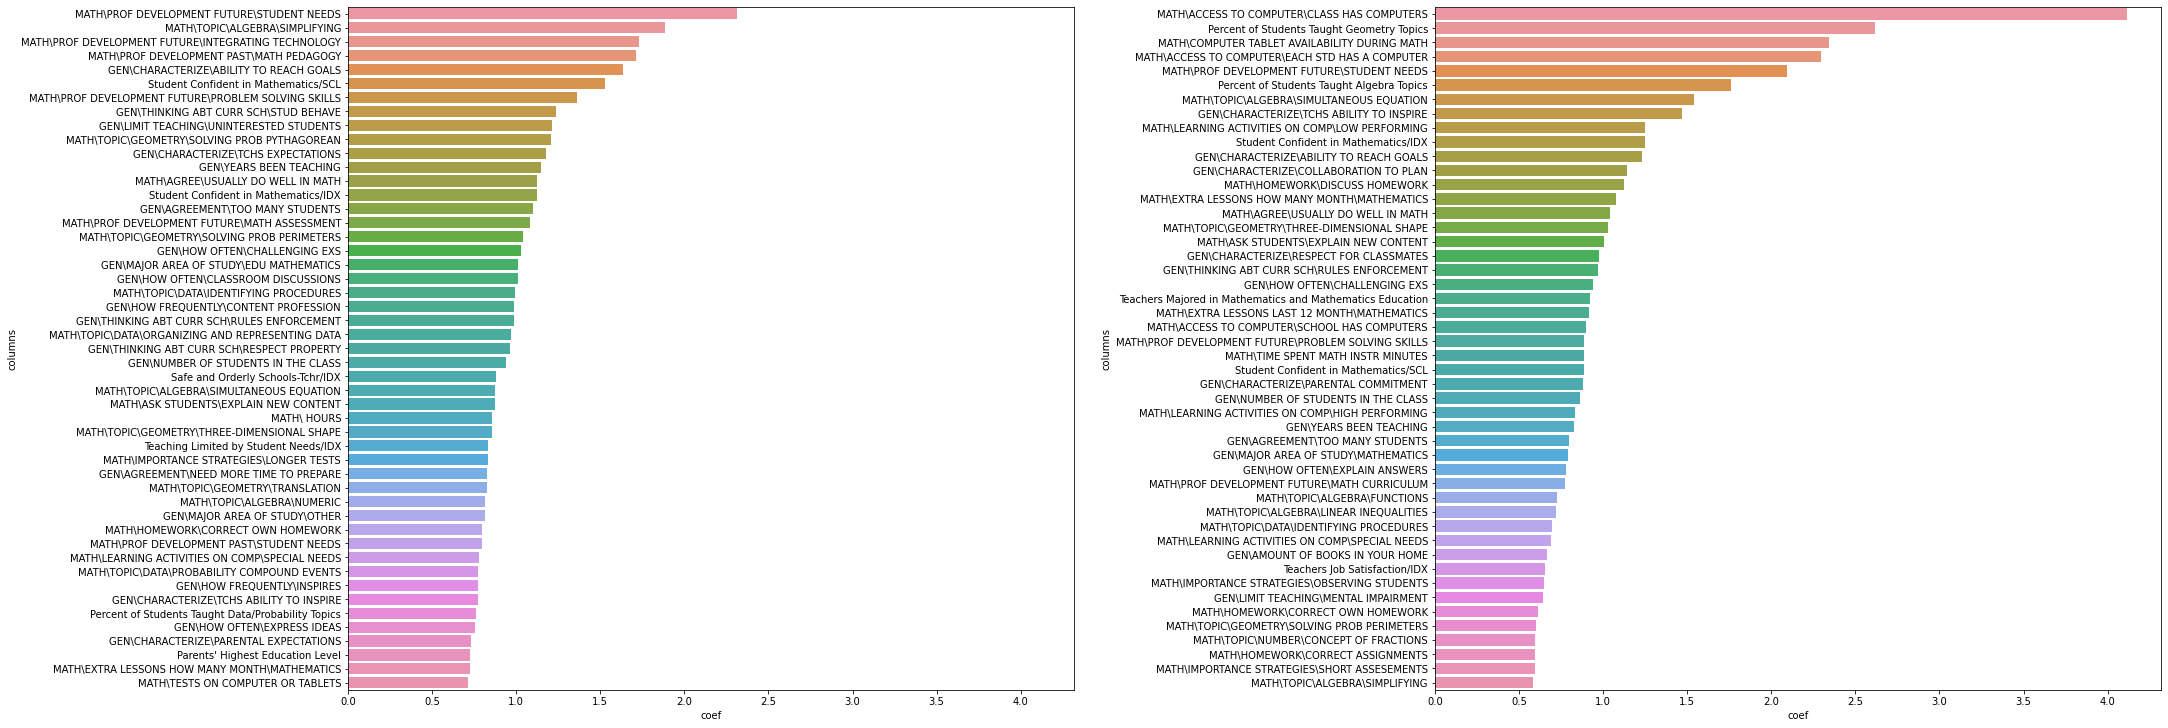

In [ ]:
plt.suptitle('Math and Science Score Regression Accuracy for Students', fontsize=16)
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(30,10), constrained_layout=True)
sns.barplot(ax=axes[0], data=feature_importance_female[0:50], x='coef', y='columns')
sns.barplot(ax=axes[1], data=feature_importance_male[0:50], x='coef', y='columns')
# fig.show()

### Observations:
For different `Genders` the amount which each features seem to affect the scores are different but the top 50 features do seem to be mostly the same.

`Availability of computers` seems to be way more important in male students.

`Simplifying of algebra` seems to be a top feature for female students but less important for our male students.

`Integration of technology in teaching` seems to be more important for female students while not as much for male students even though `availability of computers` is a top factor for them which is a questioning factoid. (What do males use computers for? hmm. :> )